# Predicting Alcohol Consumption Patterns
We aim to develop a classification model to predict whether an individual consumes alcohol, based on health indicators and demographic characteristics. This notebook outlines the data preprocessing, modeling, and evaluation processes.

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

## 2. Loading and Exploring the Data

### 2.1 Loading the Dataset

In [2]:
# Set display opions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Read data
print("Reading data...")
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
print("Data loaded successfully!")

Reading data...
Data loaded successfully!


### 2.2 Basic Data Infromation

In [3]:
print(f"Data shape: {df.shape}")

Data shape: (991346, 24)


The dataset consists of **991,346 records** and **24 features**, representing a comprehensive collection of health and demographic information.

In [10]:
print(df.head())

    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  LDL_chole  triglyceride  \
0           1  120   80    99        193         48        126            92   
1           1  130   82   106        228         55        148           121   
2           1  120   70    98        136         41         74           104   
3           1  145   87    95        201         76        104           106   
4           1  138   82   101        199         61        117           104   

   hemoglobin  urine_protein  serum_creatini

**Dataset Feature Overview**

The dataset includes **24 features** categorized into five main groups:

| **Feature Category**       | **Examples**                                                           |
|----------------------------|------------------------------------------------------------------------|
| **Demographics**           | Age, Sex                                                               |
| **Physical Measurements**  | Height, Weight, Waistline                                              |
| **Vision/Hearing**         | Left/Right Eyesight, Left/Right Hearing                                |
| **Physiological Indicators** | SBP, DBP, Cholesterol (HDL/LDL), AST, ALT, γ-GTP                    |
| **Lifestyle Factors**      | Drinking Status (`DRK_YN`)        |


In [13]:
print("\nData types:")
print(df.dtypes)


Data types:
sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object


**Data Types Overview**

The dataset includes a combination of categorical and numerical features. 

- **Categorical features** (data type: `object`) include `sex` and `DRK_YN`, which represent gender and drinking status, respectively. These variables will require encoding before modeling.
- **Integer features** (data type: `int64`) include `age`, `height`, and `weight`, which are typical demographic and physical measurements.
- **Floating-point features** (data type: `float64`) make up the majority of the dataset. These include physiological and examination indicators such as `waistline`, `SBP`, `DBP`, `cholesterol levels` (e.g., `HDL_chole`, `LDL_chole`), liver enzymes (`SGOT_AST`, `SGOT_ALT`), and hearing/vision data (e.g., `sight_left`, `hear_right`).


In [16]:
print("\nBasic statistical description:")
print(df.describe())


Basic statistical description:
                 age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
2

### 2.3 Check Missing Values

In [19]:
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values[missing_values > 0])
#Anyi0426:So no NaN

Number of missing values in each column:
Series([], dtype: int64)


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

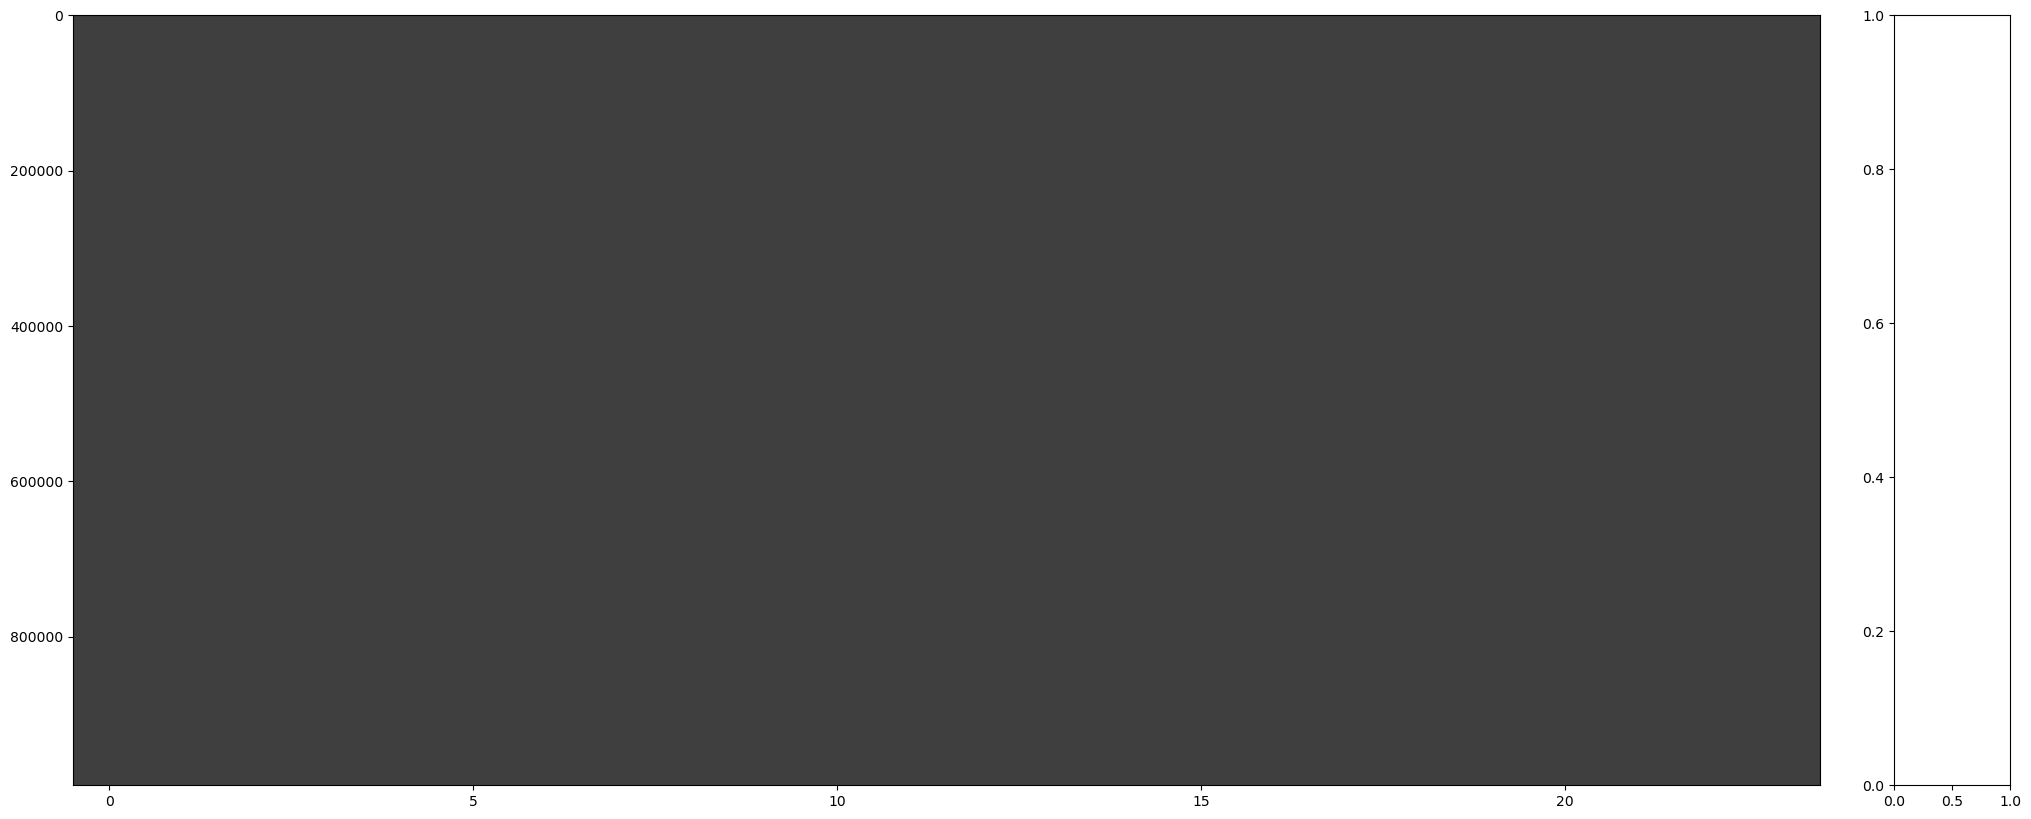

In [21]:
# use missingno to generate missing value matrix
msno.matrix(df)
plt.show()

# use missingno to generate missing value bar chart
msno.bar(df)
plt.show()

# use pandas built-in method to view missing values
print("\nMissing Values Summary:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100)[df.isnull().sum() > 0].round(2))

### 2.4 Data distribution visualization

In [27]:
def plot_numerical_distributions(df, columns, n_cols=3):
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()


numeric columns:


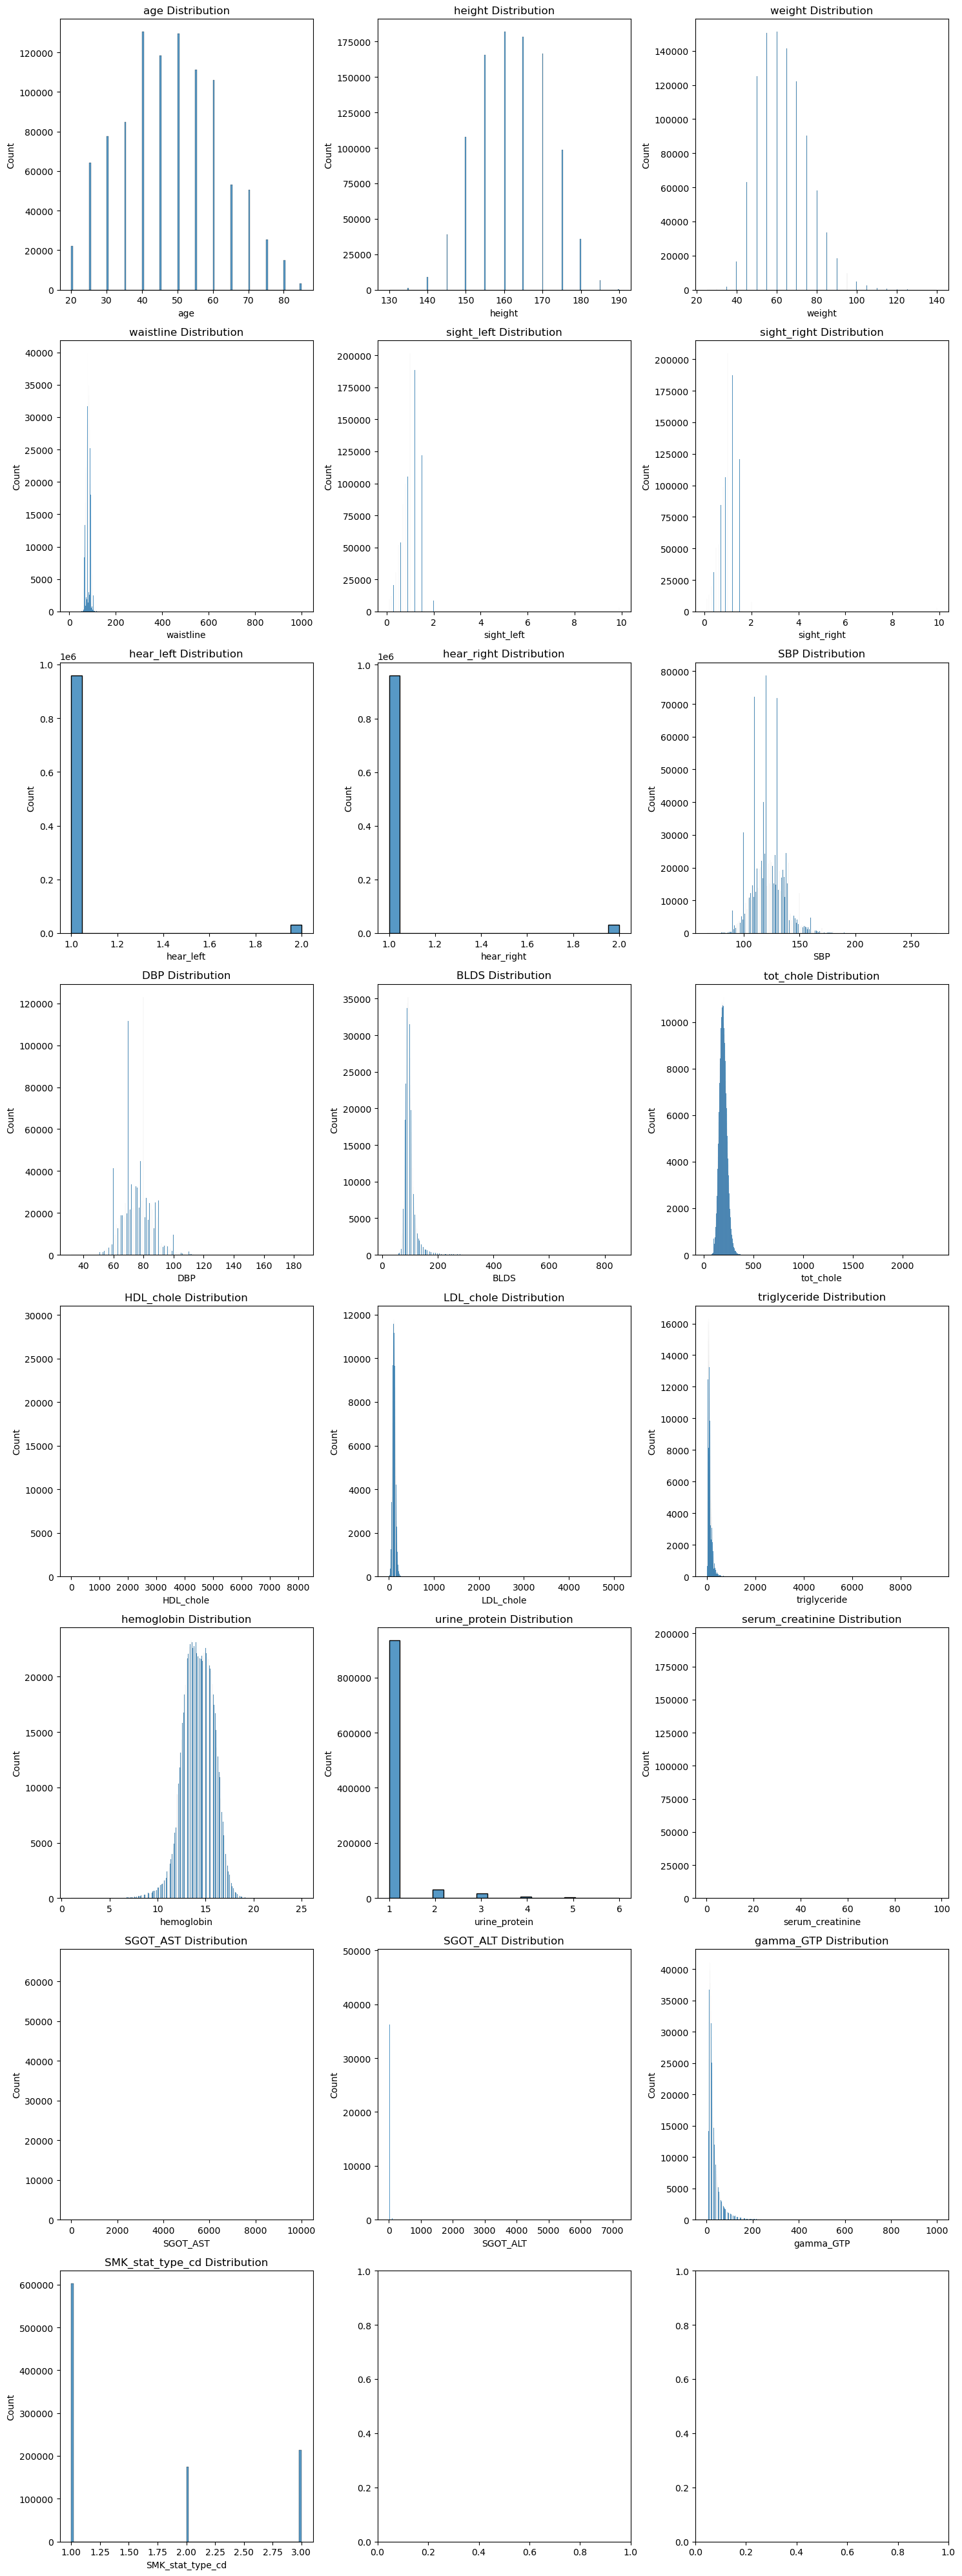

In [29]:
# select numeric columns for distribution analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nnumeric columns:")
plot_numerical_distributions(df, numeric_columns)

### 2.5 Correlation Analysis

In [31]:
def plot_correlation_matrix(df):
    """
    Plot a correlation heatmap only for numeric features,
    with automatic adjustment based on feature count.

    Parameters:
    - df: pandas DataFrame
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix
    corr = numeric_df.corr()

    # Mask upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    n_features = corr.shape[0]

    # Auto settings
    if n_features <= 20:
        figsize = (10, 8)
        annot = True
        fontsize = 10
    elif n_features <= 50:
        figsize = (14, 10)
        annot = True
        fontsize = 7
    else:
        figsize = (18, 14)
        annot = False
        fontsize = 6

    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        center=0,
        annot=annot,
        fmt=".2f",
        annot_kws={"size": fontsize},
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title('Correlation Matrix (Numeric Features Only)', fontsize=16)
    plt.tight_layout()
    plt.show()


correlation analysis:


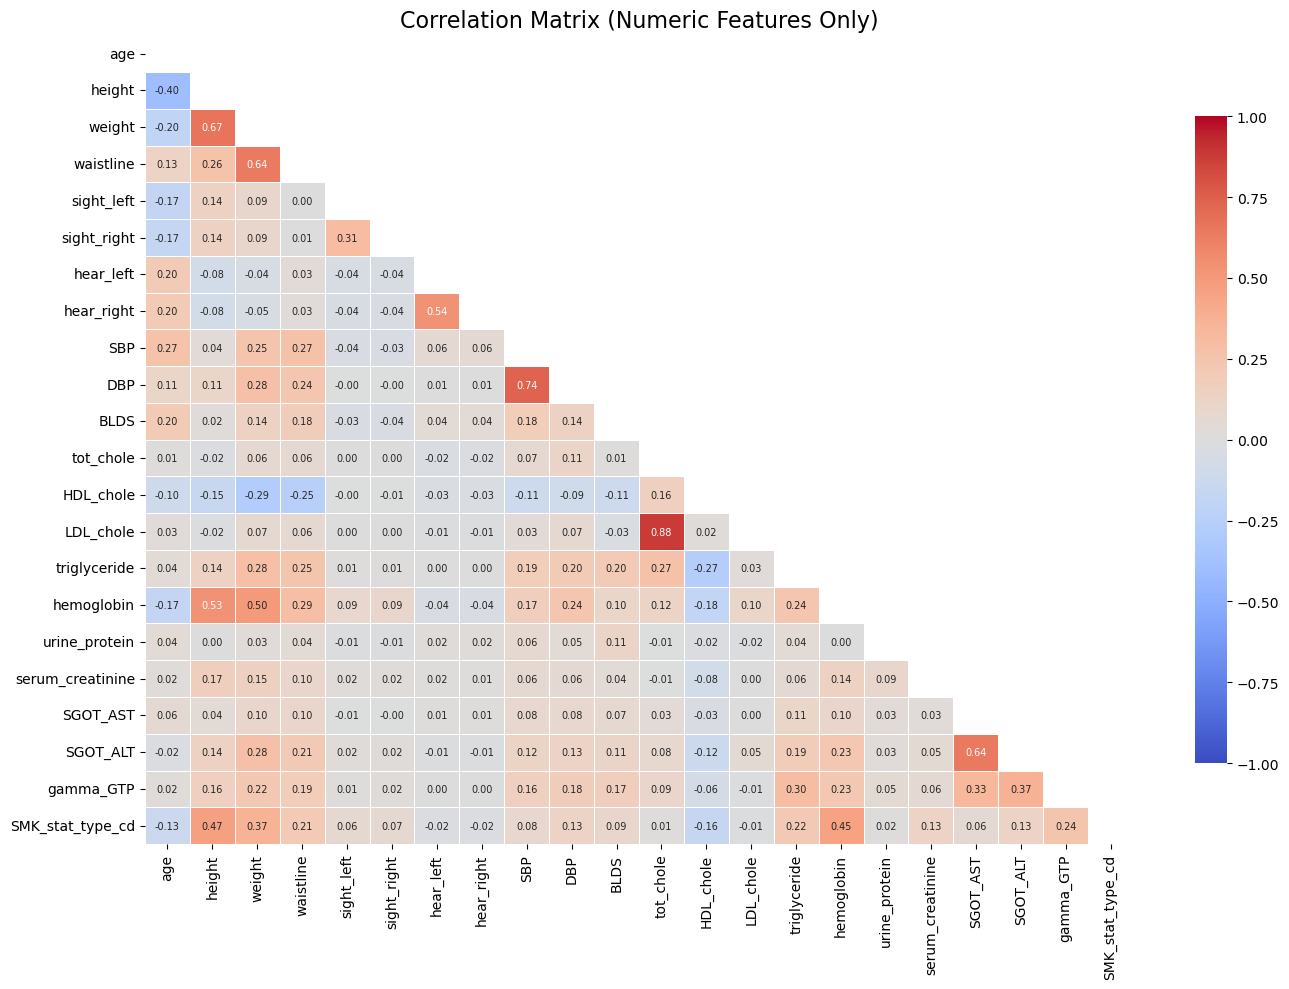

In [33]:
print("\ncorrelation analysis:")
plot_correlation_matrix(df)

### 2.5 Detect Outliers

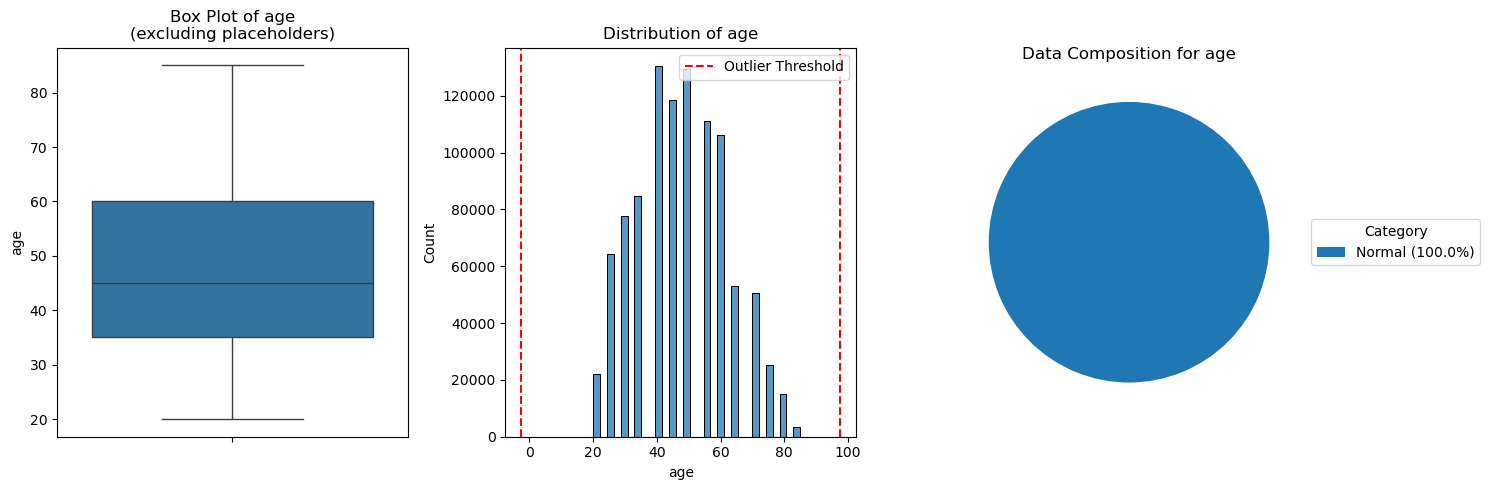


Analysis for age:
--------------------------------------------------
Total records: 991346
Normal values: 991346 (100.00%)
Outliers: 0 (0.00%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 20.00 to 85.00


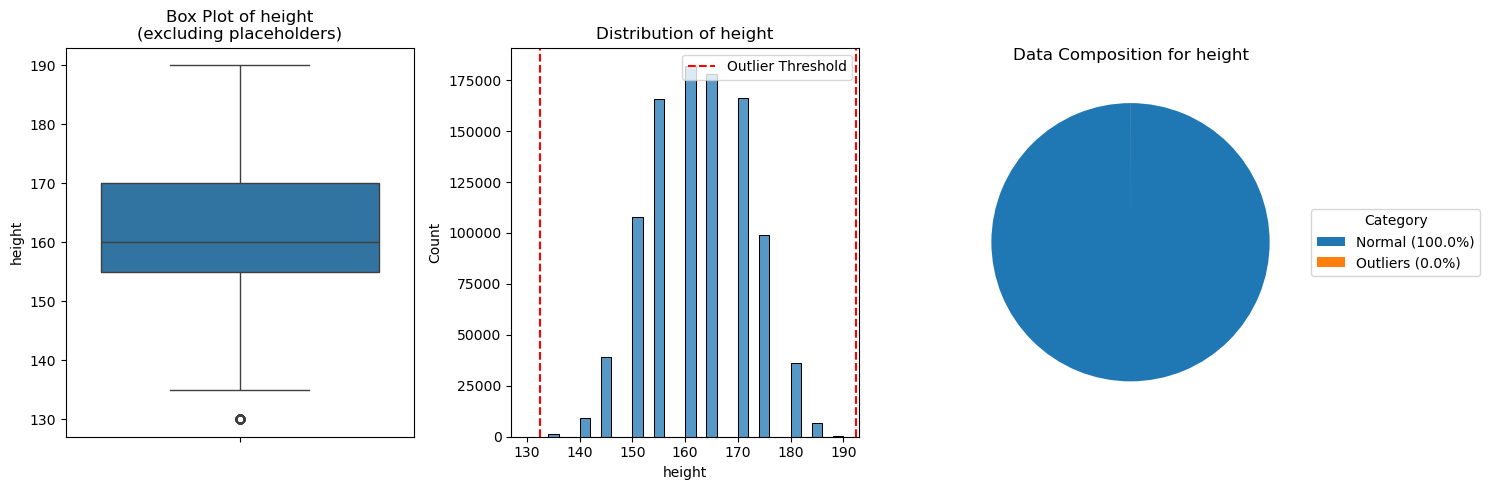


Analysis for height:
--------------------------------------------------
Total records: 991346
Normal values: 991260 (99.99%)
Outliers: 86 (0.01%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 130.00 to 190.00


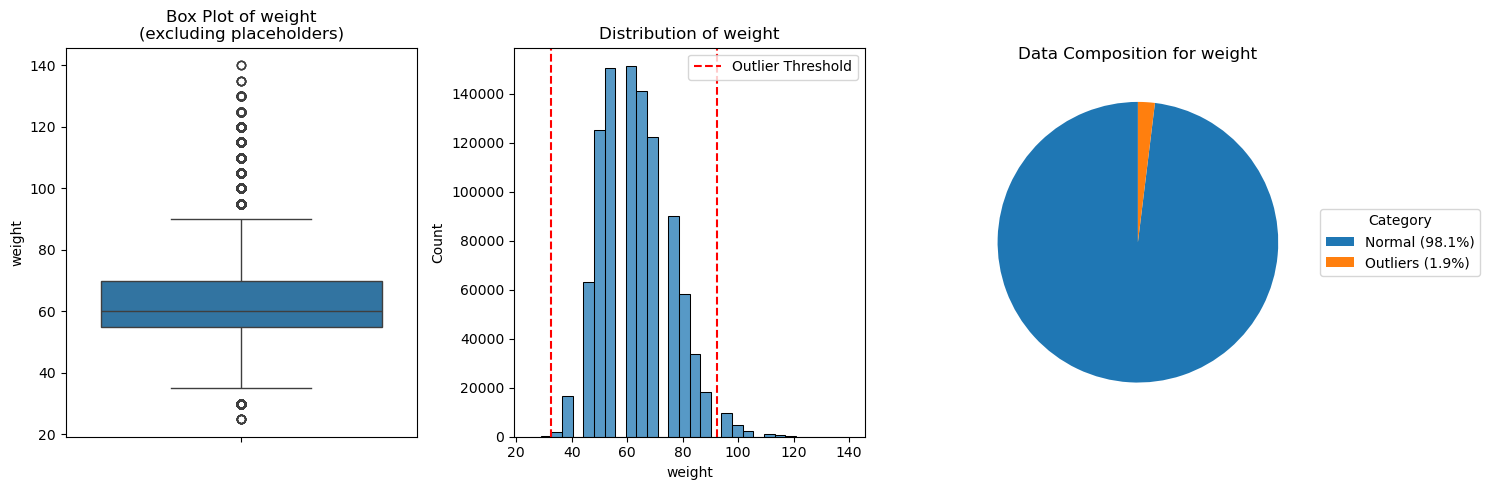


Analysis for weight:
--------------------------------------------------
Total records: 991346
Normal values: 972125 (98.06%)
Outliers: 19221 (1.94%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 25.00 to 140.00


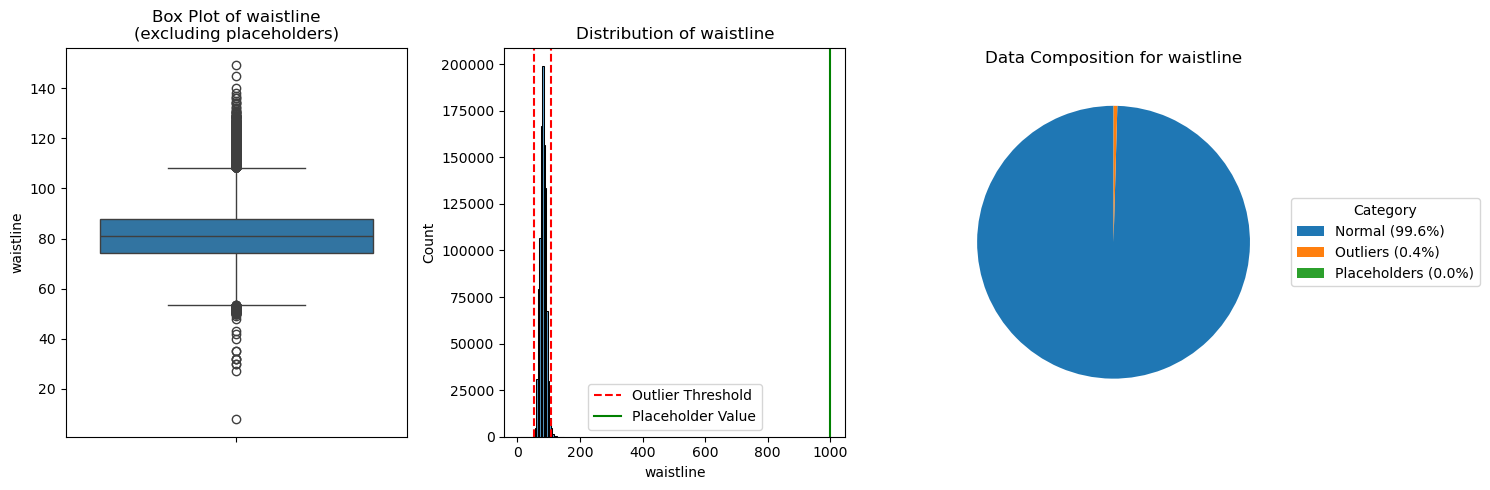


Analysis for waistline:
--------------------------------------------------
Total records: 991346
Normal values: 986929 (99.55%)
Outliers: 4360 (0.44%)
Placeholders: 57 (0.01%)
Value range (excluding outliers and placeholders): 8.00 to 149.10
Placeholder value used: 999


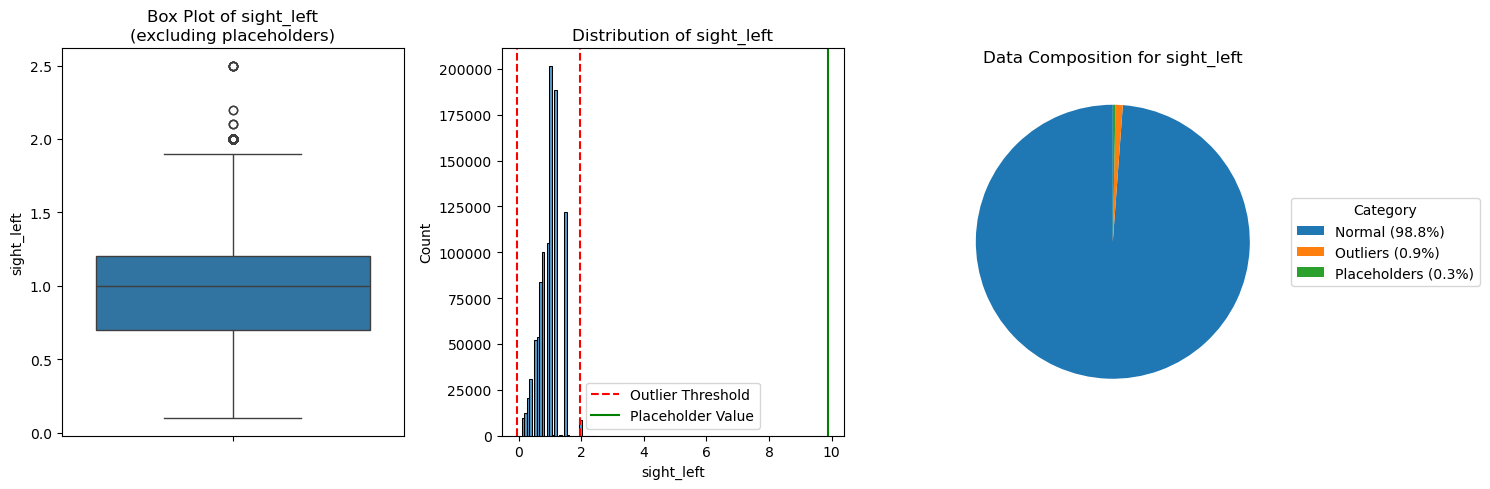


Analysis for sight_left:
--------------------------------------------------
Total records: 991346
Normal values: 979764 (98.83%)
Outliers: 8464 (0.85%)
Placeholders: 3118 (0.31%)
Value range (excluding outliers and placeholders): 0.10 to 2.50
Placeholder value used: 9.9


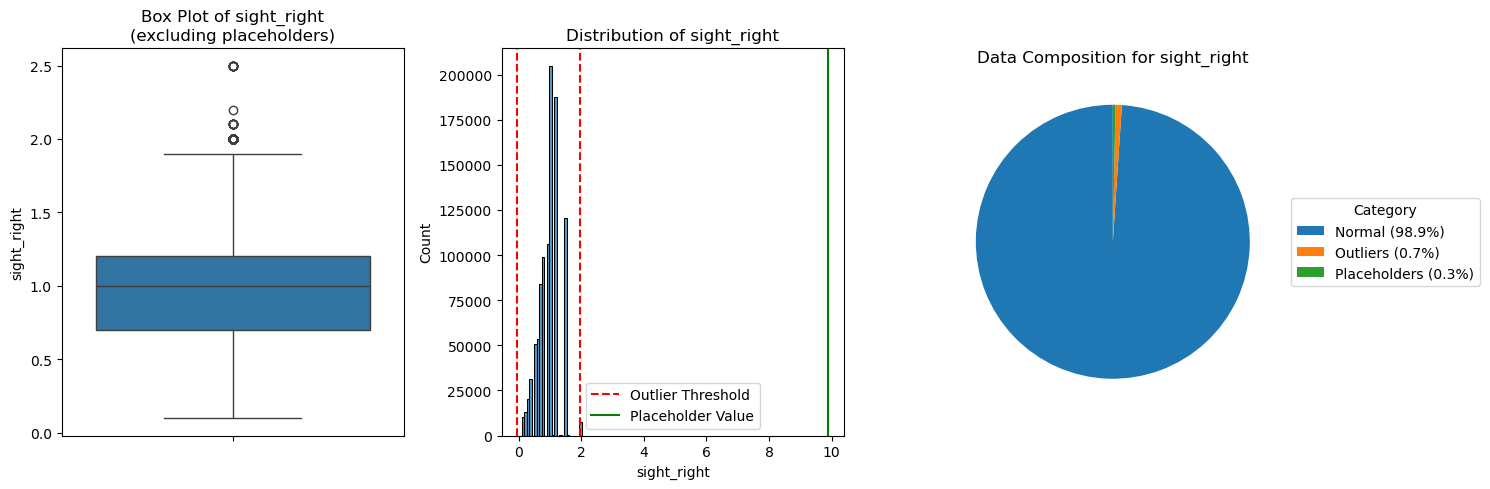


Analysis for sight_right:
--------------------------------------------------
Total records: 991346
Normal values: 980851 (98.94%)
Outliers: 7384 (0.74%)
Placeholders: 3111 (0.31%)
Value range (excluding outliers and placeholders): 0.10 to 2.50
Placeholder value used: 9.9


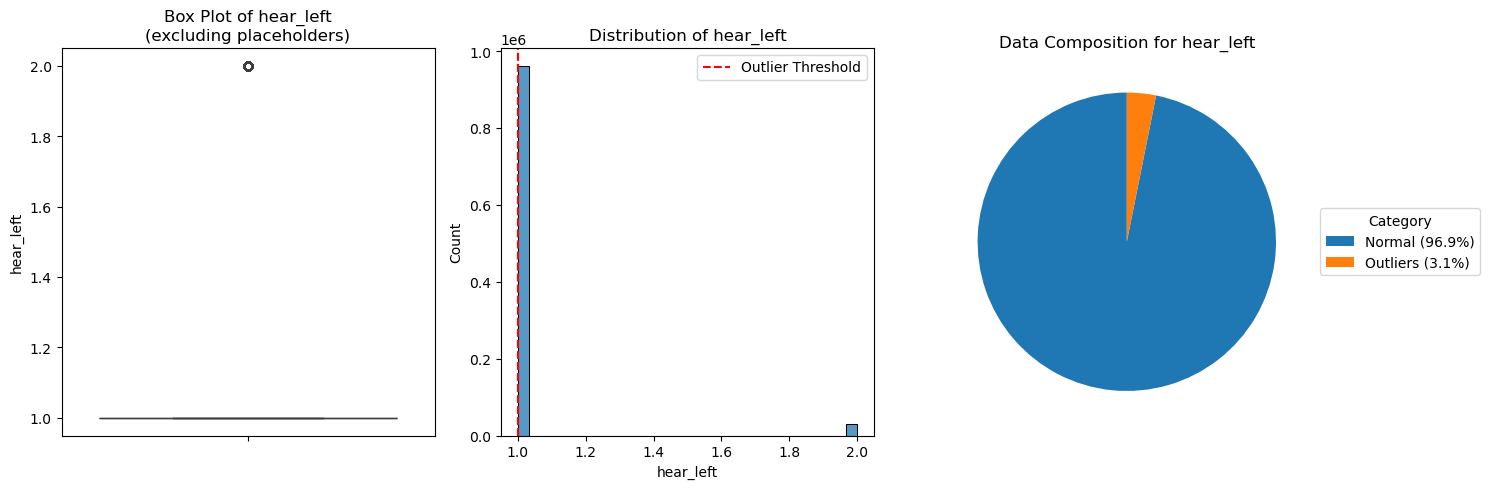


Analysis for hear_left:
--------------------------------------------------
Total records: 991346
Normal values: 960124 (96.85%)
Outliers: 31222 (3.15%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 2.00


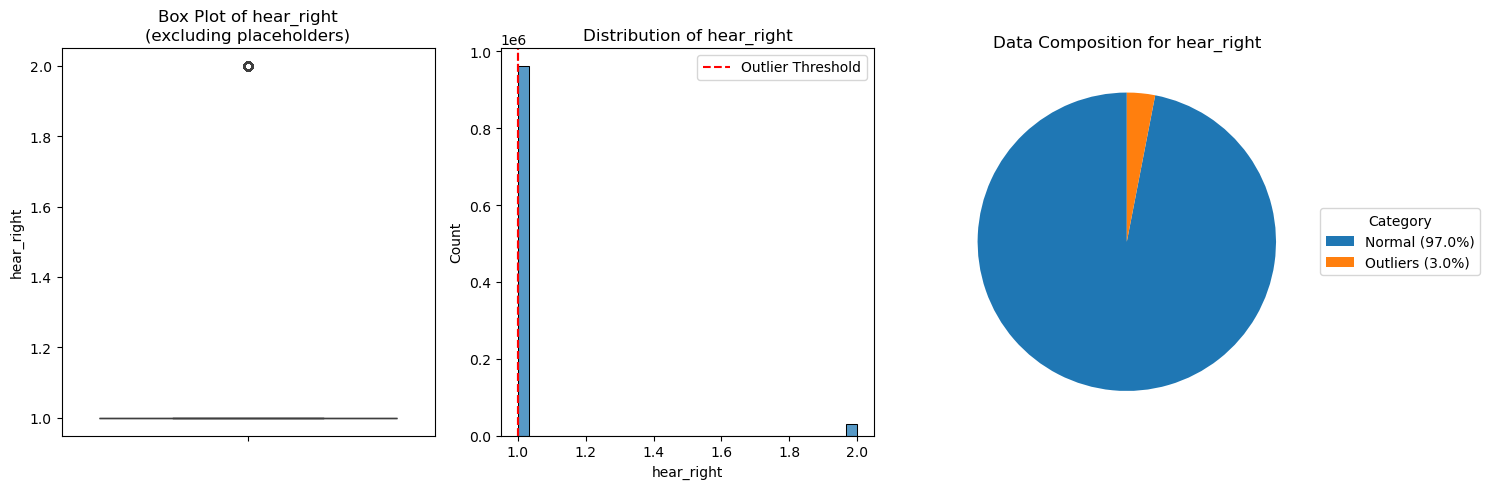


Analysis for hear_right:
--------------------------------------------------
Total records: 991346
Normal values: 961134 (96.95%)
Outliers: 30212 (3.05%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 2.00


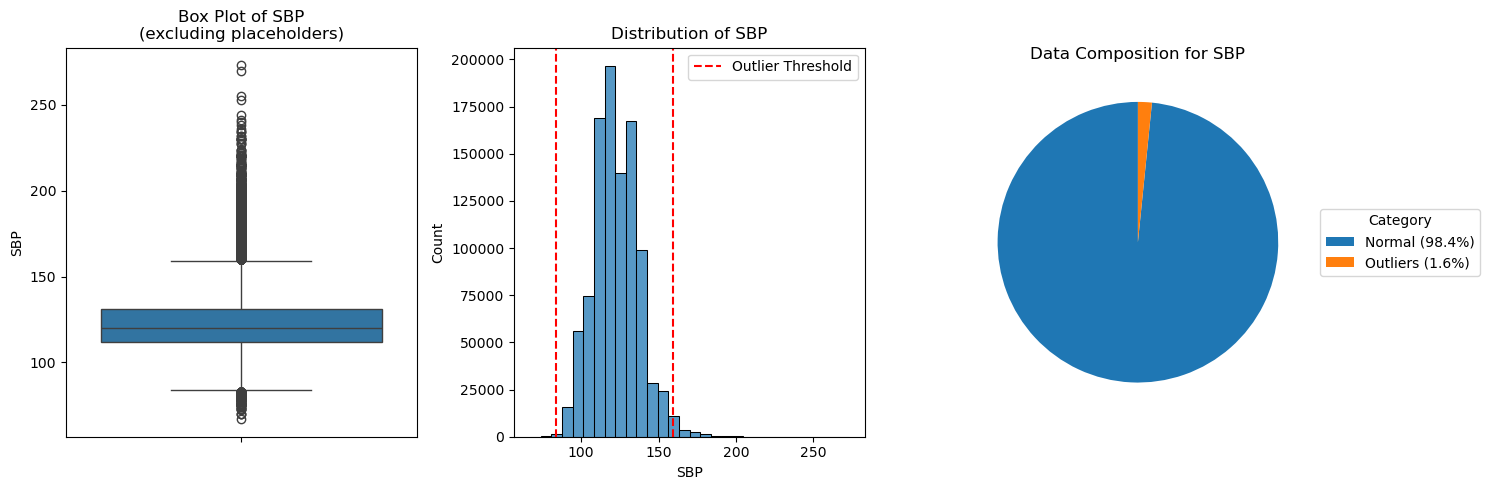


Analysis for SBP:
--------------------------------------------------
Total records: 991346
Normal values: 975510 (98.40%)
Outliers: 15836 (1.60%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 67.00 to 273.00


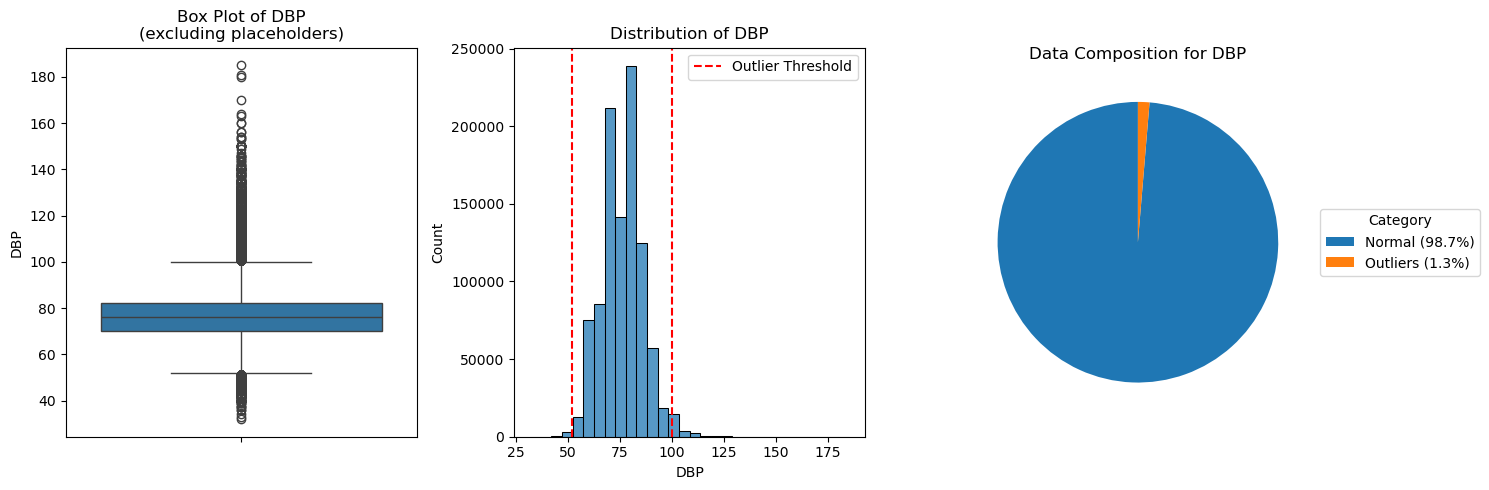


Analysis for DBP:
--------------------------------------------------
Total records: 991346
Normal values: 978224 (98.68%)
Outliers: 13122 (1.32%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 32.00 to 185.00


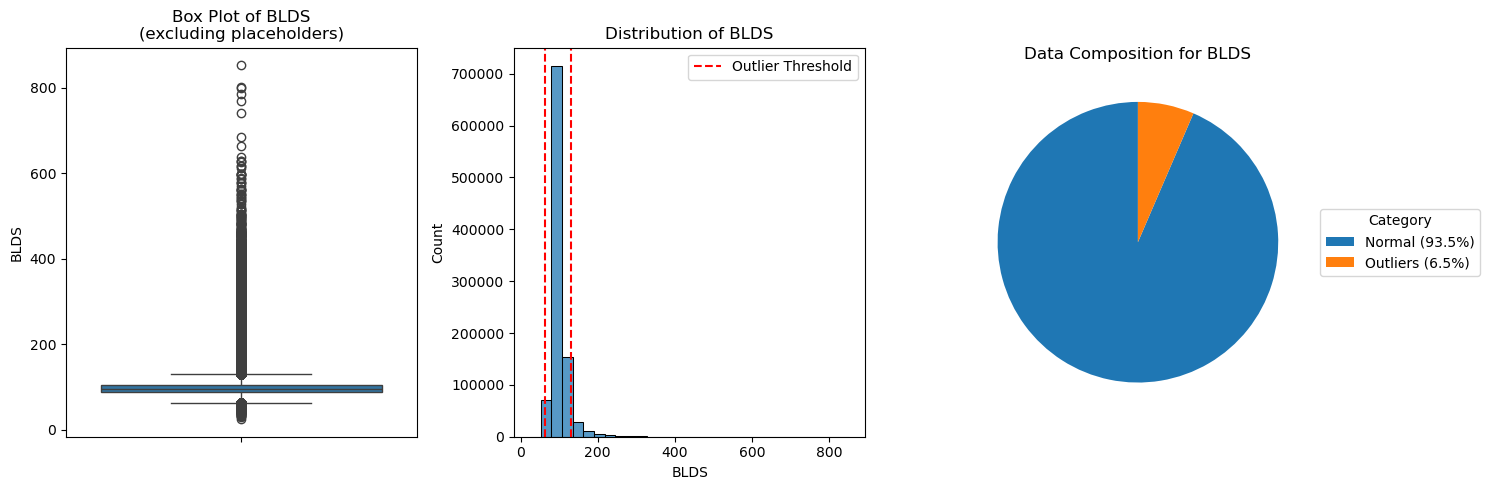


Analysis for BLDS:
--------------------------------------------------
Total records: 991346
Normal values: 927144 (93.52%)
Outliers: 64202 (6.48%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 25.00 to 852.00


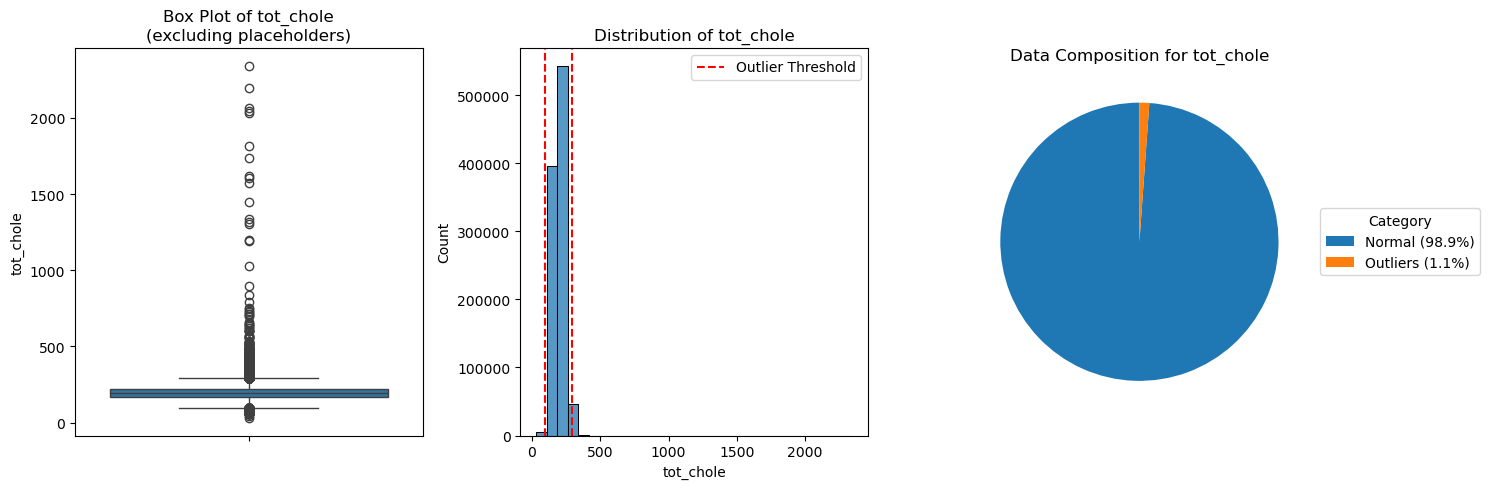


Analysis for tot_chole:
--------------------------------------------------
Total records: 991346
Normal values: 980048 (98.86%)
Outliers: 11298 (1.14%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 30.00 to 2344.00


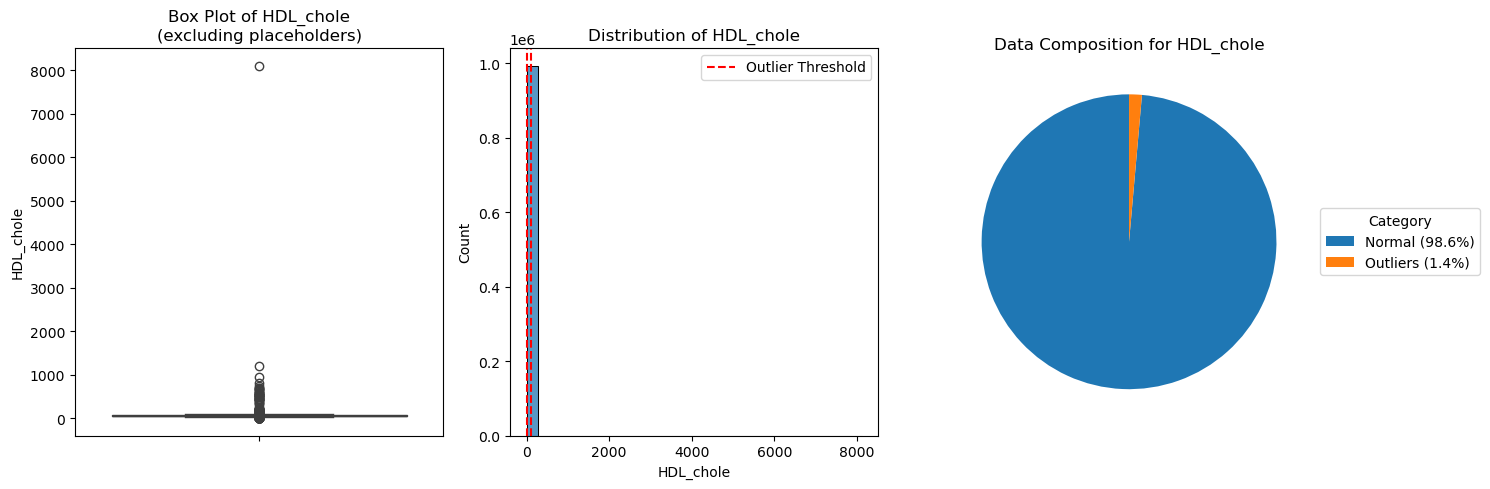


Analysis for HDL_chole:
--------------------------------------------------
Total records: 991346
Normal values: 977488 (98.60%)
Outliers: 13858 (1.40%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 8110.00


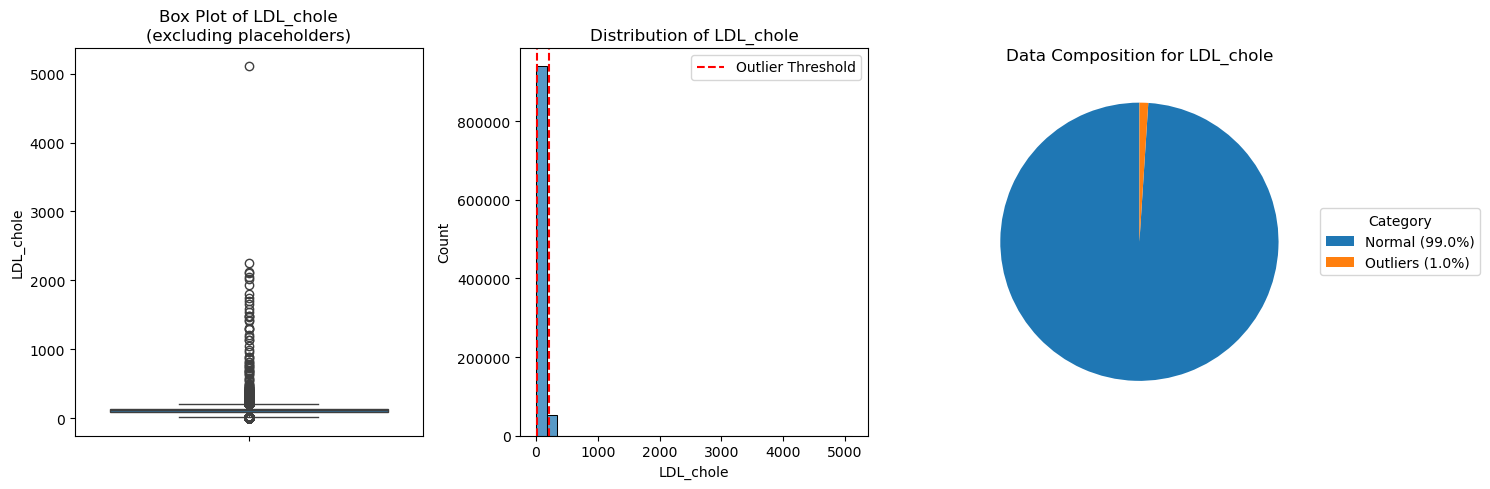


Analysis for LDL_chole:
--------------------------------------------------
Total records: 991346
Normal values: 981248 (98.98%)
Outliers: 10098 (1.02%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 5119.00


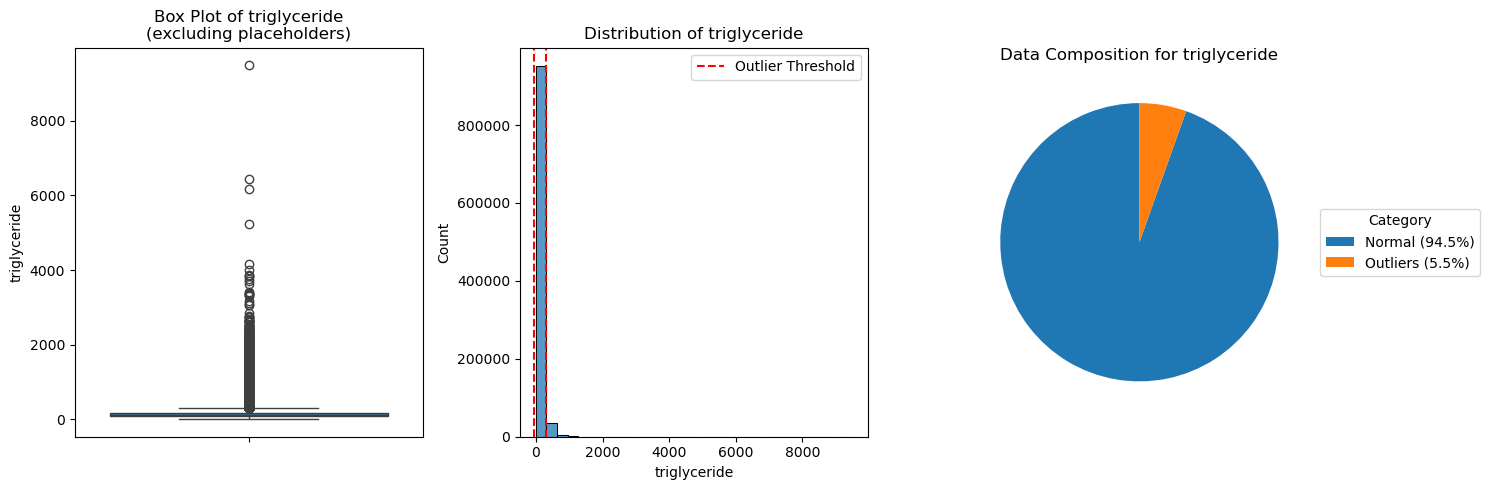


Analysis for triglyceride:
--------------------------------------------------
Total records: 991346
Normal values: 937242 (94.54%)
Outliers: 54104 (5.46%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 9490.00


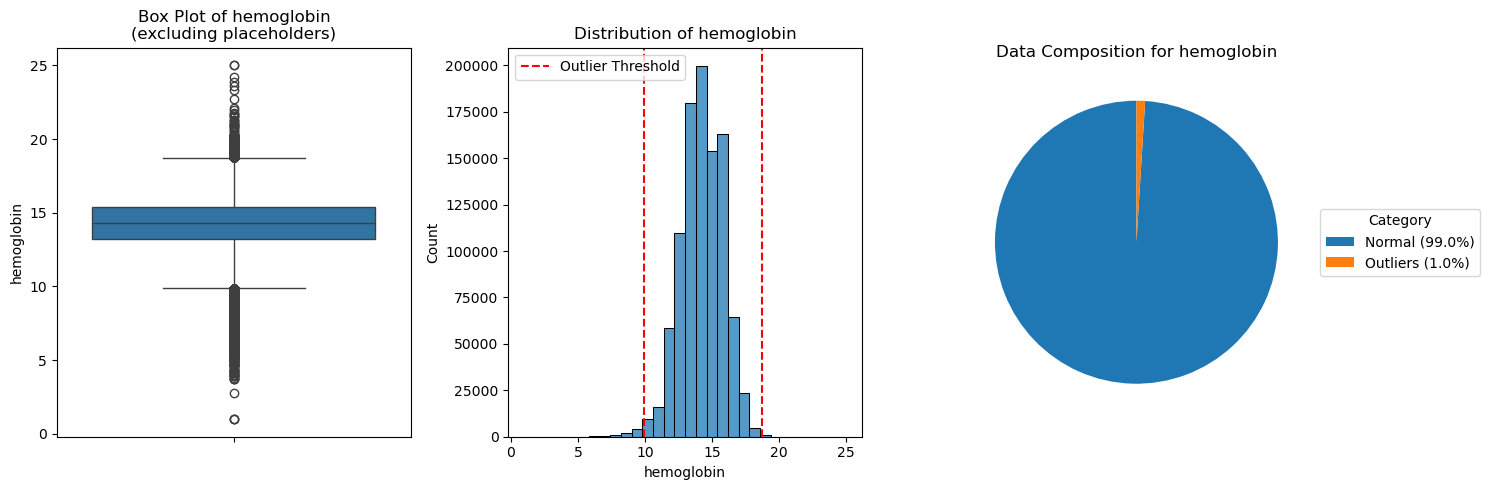


Analysis for hemoglobin:
--------------------------------------------------
Total records: 991346
Normal values: 981586 (99.02%)
Outliers: 9760 (0.98%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 25.00


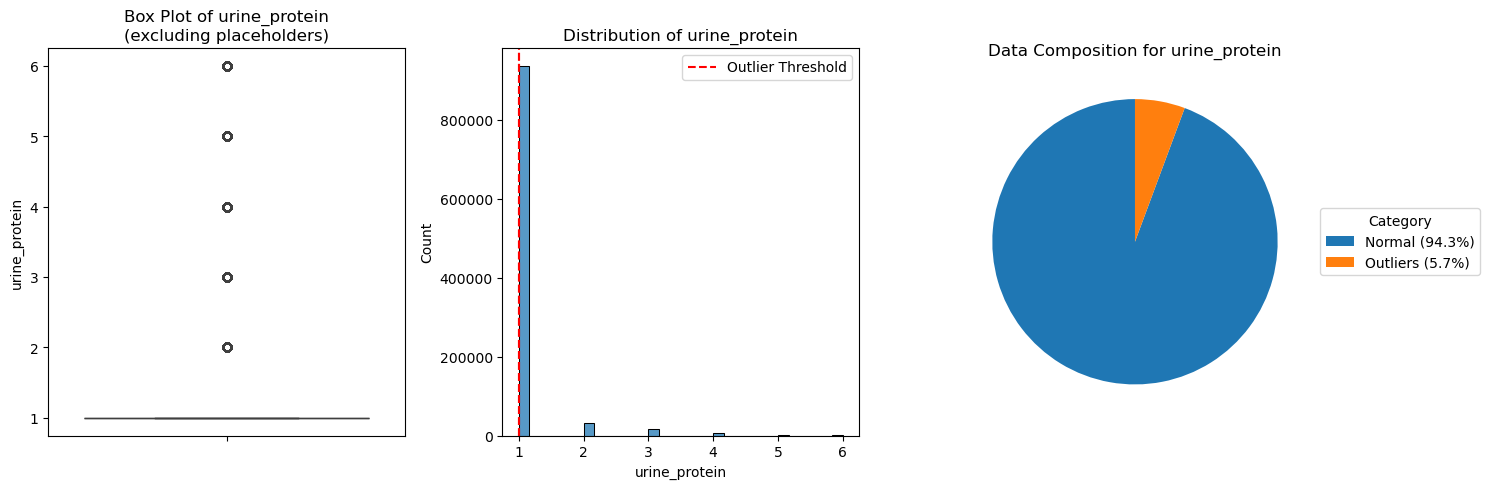


Analysis for urine_protein:
--------------------------------------------------
Total records: 991346
Normal values: 935175 (94.33%)
Outliers: 56171 (5.67%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 6.00


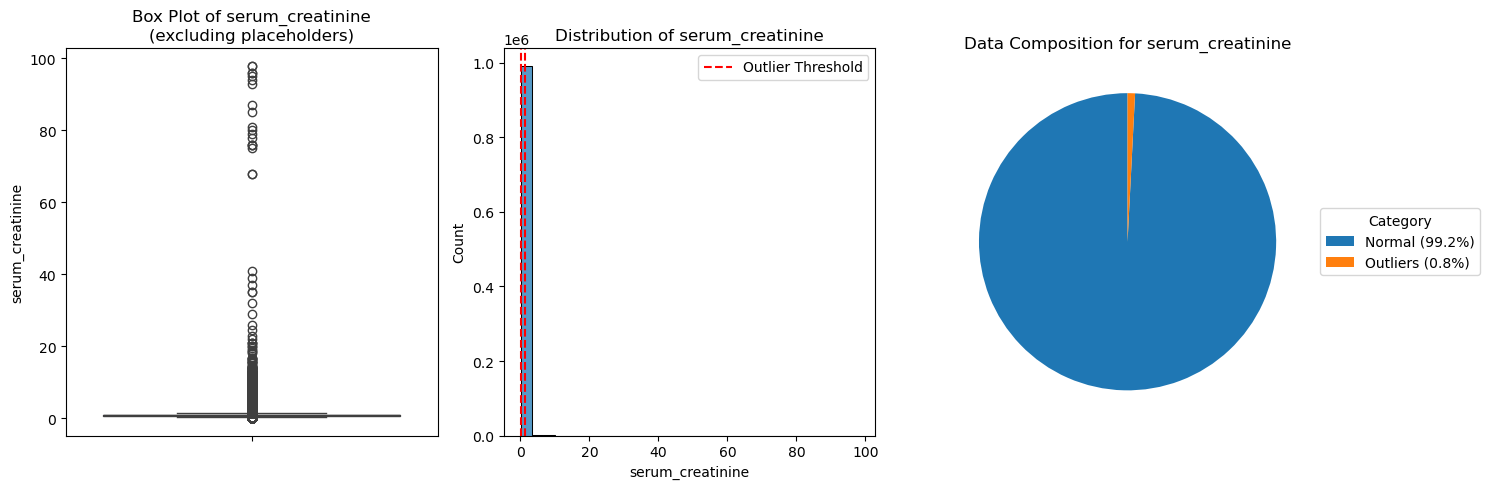


Analysis for serum_creatinine:
--------------------------------------------------
Total records: 991346
Normal values: 983341 (99.19%)
Outliers: 8005 (0.81%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 0.10 to 98.00


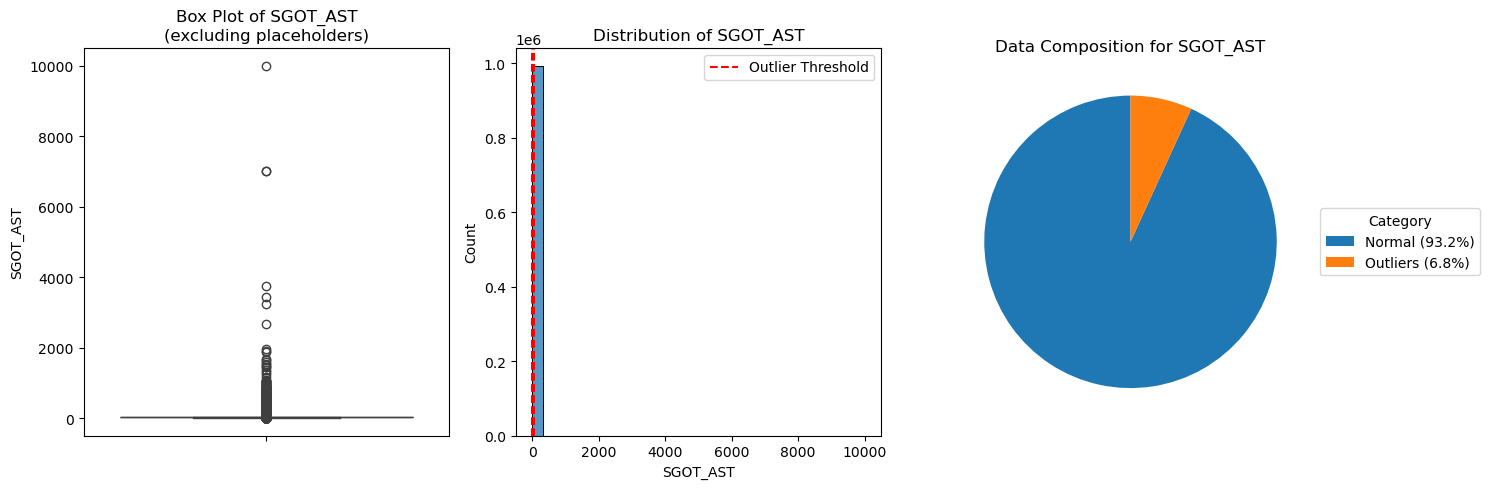


Analysis for SGOT_AST:
--------------------------------------------------
Total records: 991346
Normal values: 923732 (93.18%)
Outliers: 67614 (6.82%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 9999.00


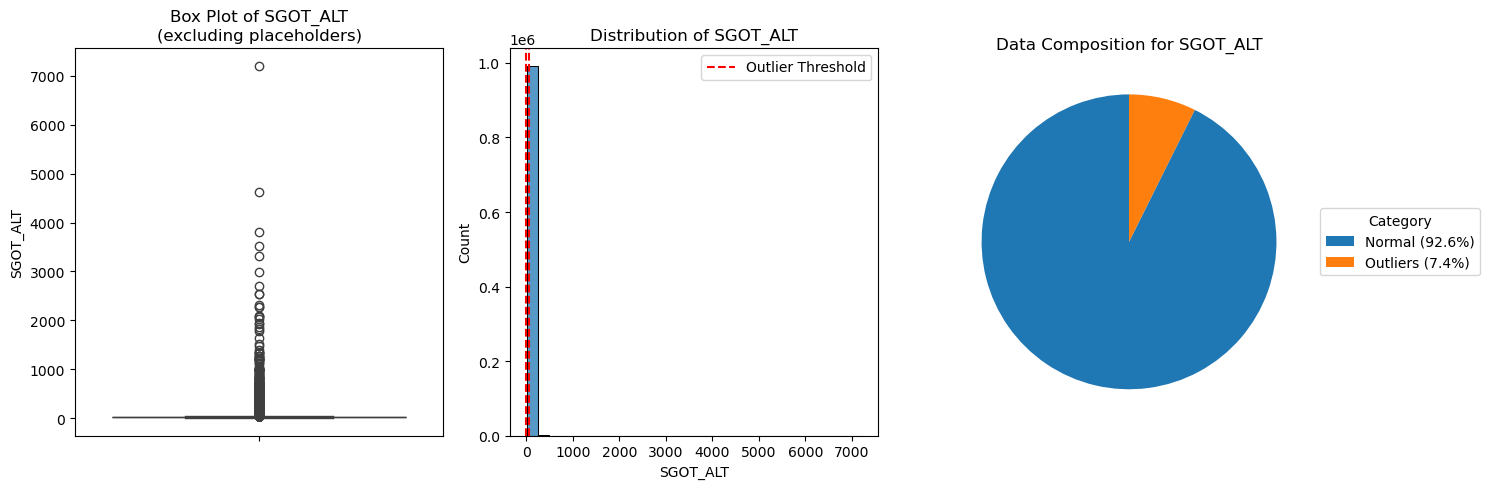


Analysis for SGOT_ALT:
--------------------------------------------------
Total records: 991346
Normal values: 918418 (92.64%)
Outliers: 72928 (7.36%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 7210.00


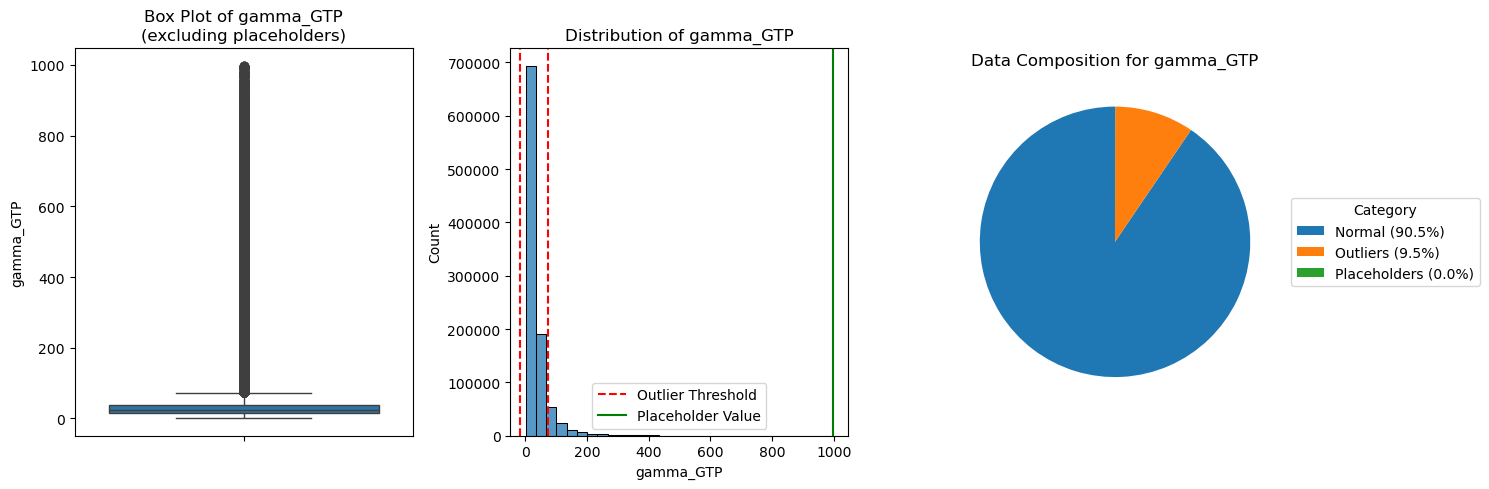


Analysis for gamma_GTP:
--------------------------------------------------
Total records: 991346
Normal values: 897204 (90.50%)
Outliers: 93903 (9.47%)
Placeholders: 239 (0.02%)
Value range (excluding outliers and placeholders): 1.00 to 998.00
Placeholder value used: 999


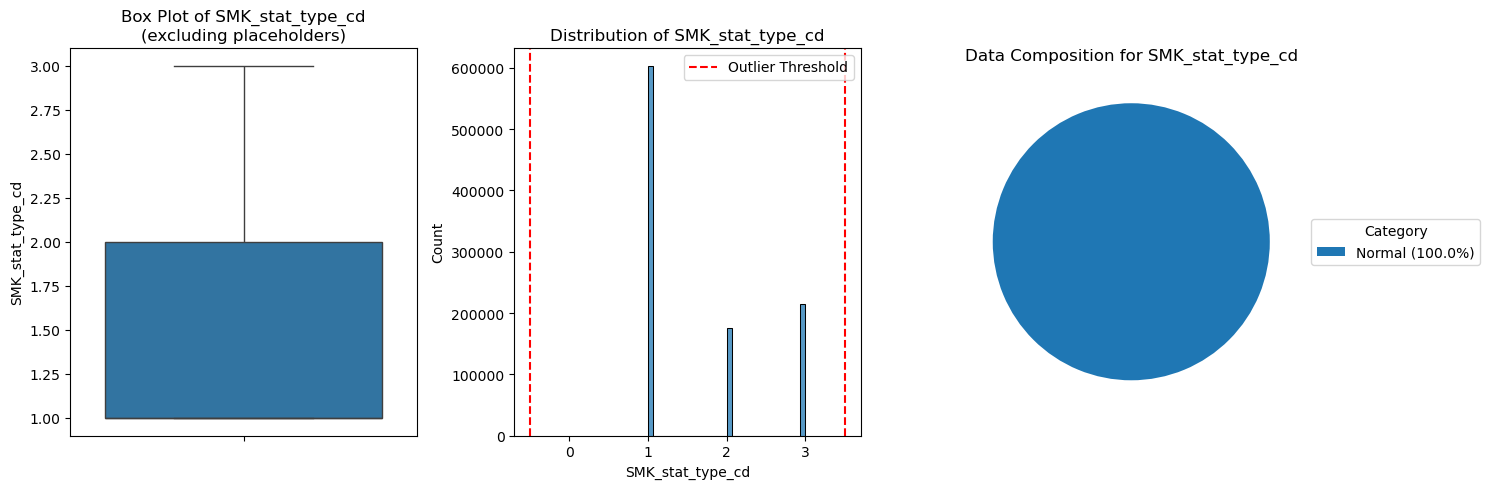


Analysis for SMK_stat_type_cd:
--------------------------------------------------
Total records: 991346
Normal values: 991346 (100.00%)
Outliers: 0 (0.00%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 3.00


In [35]:
def detect_outliers_and_placeholders(df, columns):
    """
    Detect both outliers and placeholder values in the dataset
    """
    results = {}  # Dictionary to store results for each column
    
    # Define known placeholder values
    placeholders = {
        'waistline': 999,
        'sight_left': 9.9,
        'sight_right': 9.9,
        'gamma_GTP': 999 #Anyi0426 *Added
        # 'column_name': placeholder_value,
    }
    
    for col in columns:
        # Only proceed if the column is of numeric type
        if df[col].dtype in ['int64', 'float64']:
            # Initialize results dictionary for this column
            results[col] = {
                'outliers': 0,
                'placeholders': 0,
                'outlier_percentage': 0,
                'placeholder_percentage': 0
            }
            
            # Check for placeholder values first
            if col in placeholders:
                placeholder_mask = df[col] == placeholders[col]
                placeholder_count = placeholder_mask.sum()
                
                # Remove placeholder values for outlier detection
                df_clean = df[~placeholder_mask]
            else:
                placeholder_count = 0
                df_clean = df
            
            # Calculate quartiles excluding placeholder values
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers (excluding placeholder values)
            outlier_count = df_clean[(df_clean[col] < lower_bound) | 
                                   (df_clean[col] > upper_bound)][col].count()
            
            # Store results
            total_rows = len(df)
            results[col]['outliers'] = outlier_count
            results[col]['placeholders'] = placeholder_count
            results[col]['outlier_percentage'] = (outlier_count / total_rows) * 100
            results[col]['placeholder_percentage'] = (placeholder_count / total_rows) * 100
            
            # Visualization for this column
            plt.figure(figsize=(15, 5))
            
            # Plot 1: Box Plot (excluding placeholders)
            plt.subplot(131)
            sns.boxplot(y=df_clean[col])
            plt.title(f'Box Plot of {col}\n(excluding placeholders)')
            
            # Plot 2: Distribution
            plt.subplot(132)
            sns.histplot(data=df_clean, x=col, bins=30)
            plt.axvline(x=lower_bound, color='r', linestyle='--', label='Outlier Threshold')
            plt.axvline(x=upper_bound, color='r', linestyle='--')
            if col in placeholders:
                plt.axvline(x=placeholders[col], color='g', linestyle='-', 
                          label='Placeholder Value')
            plt.title(f'Distribution of {col}')
            plt.legend()
            
            # Plot 3: Improved Pie Chart for Small Values
            
            plt.subplot(133)
            normal_count = total_rows - outlier_count - placeholder_count
            sizes = [normal_count, outlier_count, placeholder_count]
            labels = ['Normal', 'Outliers', 'Placeholders']

            # Filter out zero-size categories
            sizes_nonzero = [size for size in sizes if size > 0]
            labels_nonzero = [label for size, label in zip(sizes, labels) if size > 0]

            # Compute percentages manually
            total = sum(sizes_nonzero)
            percentages = [size / total * 100 for size in sizes_nonzero]

            # Build legend labels with percentages
            legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(labels_nonzero, percentages)]

            # Handle case when everything is zero
            if len(sizes_nonzero) == 0:
                sizes_nonzero = [1]
                legend_labels = ['No Data']

            # Plot pie chart without labels or percentages
            wedges, _ = plt.pie(
                sizes_nonzero,
                startangle=90,
                labels=None,          # No label inside pie
                autopct=None,          # No percentage inside pie
                textprops={'fontsize': 10}
            )

            # Add a clean legend with category names and percentages
            plt.legend(
                wedges, legend_labels,
                title="Category",
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1),
                fontsize=10
            )

            plt.title(f'Data Composition for {col}')
            plt.tight_layout()
            plt.show()
            
            # Print detailed statistics
            print(f"\nAnalysis for {col}:")
            print("-" * 50)
            print(f"Total records: {total_rows}")
            print(f"Normal values: {normal_count} ({normal_count/total_rows*100:.2f}%)")
            print(f"Outliers: {outlier_count} ({results[col]['outlier_percentage']:.2f}%)")
            print(f"Placeholders: {placeholder_count} ({results[col]['placeholder_percentage']:.2f}%)")
            print(f"Value range (excluding outliers and placeholders): {df_clean[col].min():.2f} to {df_clean[col].max():.2f}")
            
            if col in placeholders:
                print(f"Placeholder value used: {placeholders[col]}")
    
    return results

# 使用函数
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
results = detect_outliers_and_placeholders(df, numeric_columns)


### 2.6 Categorical Variable Analysis


categorical variable analysis:

sex distribution:
sex
Male      526415
Female    464931
Name: count, dtype: int64


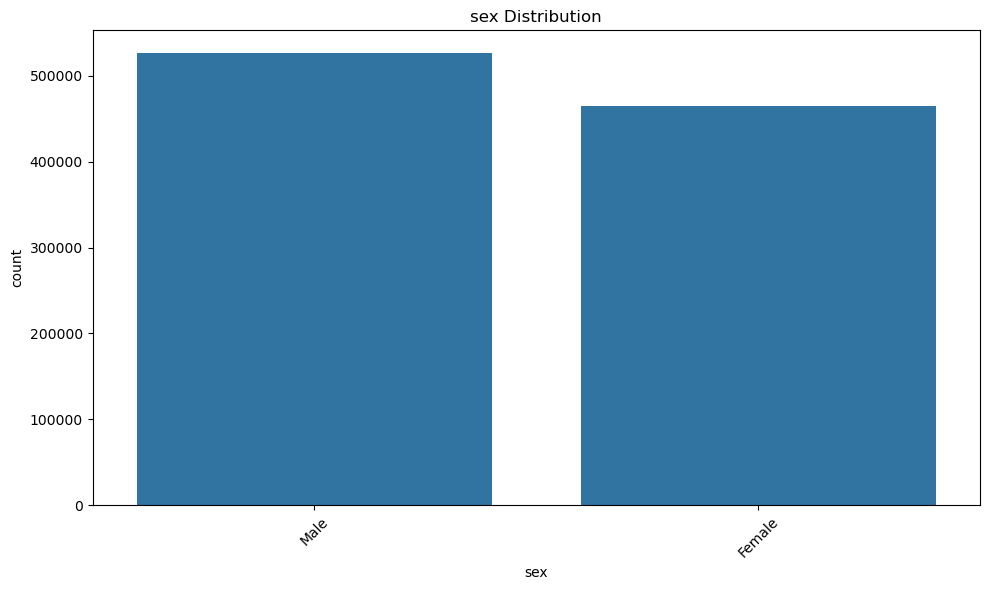


DRK_YN distribution:
DRK_YN
N    495858
Y    495488
Name: count, dtype: int64


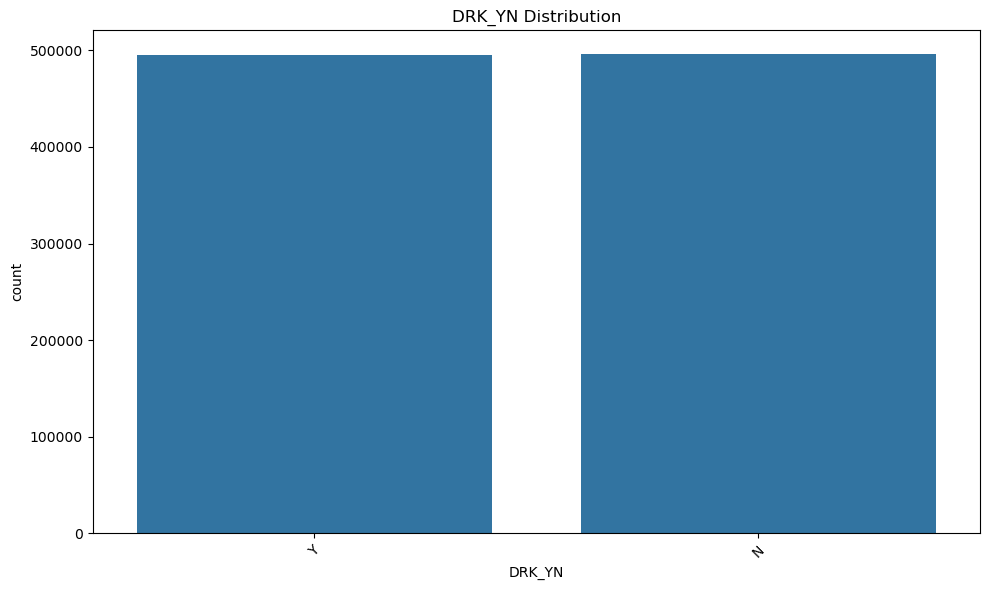

In [42]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("\ncategorical variable analysis:")
    for col in categorical_columns:
        print(f"\n{col} distribution:")
        print(df[col].value_counts())
        
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## 3. Data Preprocessing

### Placeholder Value Handling

Certain features in the dataset contain placeholder values representing special conditions or invalid entries. These values were processed as follows:

- **Vision (sight_left, sight_right)**:  
  A value of `9.9` indicates total vision loss (blindness). We replaced these with `0.0` to reflect no measurable vision, preserving the clinical meaning for modeling purposes.

- **Waistline**:  
  A value of `999` is used as a placeholder for invalid or missing waist measurements. These were replaced with `NaN` to be handled later by appropriate imputation strategies.


In [44]:
# Count the number of records where waistline equals the placeholder value 999 
# Anyi0426: Count the number of records where gamma_GTP equals the placeholder value 999
num_waistline_999 = (df['waistline'] == 999).sum()
num_gamma_GTP_999 = (df['gamma_GTP'] == 999).sum()
print(f"Number of records with waistline = 999: {num_waistline_999}")
print(f"Number of records with gamma_GTP = 999: {num_gamma_GTP_999}")

Number of records with waistline = 999: 57
Number of records with gamma_GTP = 999: 239


In [46]:
# Replace placeholder values
def replace_placeholders(df):
    df = df.copy()  # Avoid modifying original DataFrame

    # Replace waistline placeholder with NaN
    # Anyi0426: Replace gamma_GTP placeholder with NaN
    df['waistline'] = df['waistline'].replace(999, np.nan)
    df['gamma_GTP'] = df['gamma_GTP'].replace(999, np.nan)
    
    # Replace 9.9 with 0.0 for blindness in vision fields #Anyi0426:Maybe just leave them as 9.9 since it has a semantic meaning in indicating extreme difference?
    df['sight_left'] = df['sight_left'].replace(9.9, 0.0)
    df['sight_right'] = df['sight_right'].replace(9.9, 0.0)

    return df

In [48]:
df = replace_placeholders(df)
print(df.waistline.isnull().sum())
print(df.gamma_GTP.isnull().sum()) #Anyi0426:*Added

57
239


### 3.2 Handling Missing Values: Waistline (Gender-Based Median)
To impute missing `waistline` values (n = 57), we applied median imputation grouped by the `sex` column:

- For each individual with a missing waistline, we used the **median waistline value of their gender group**.
- This method is more precise than global median imputation and avoids overfitting compared to regression imputation on a small sample size.
- A new column `waistline_imputed` was created to track which values were filled.



In [101]:
#Anyi0426: Still remains to be checked: Whether this group is distinctly different from others

# def impute_waistline_by_sex(df, waistline_col='waistline', sex_col='sex'):
#     """
#     Impute missing waistline values by sex group median without adding new columns to the DataFrame.

#     Parameters:
#     - df: pandas DataFrame
#     - waistline_col: name of the waistline column
#     - sex_col: name of the sex column

#     Returns:
#     - df_new: DataFrame with imputed waistline, no extra columns
#     """
#     df_new = df.copy()

#     # Create a temporary mask to track missing values
#     missing_mask = df_new[waistline_col].isnull()

#     # Fill missing waistline values with sex group median
#     df_new[waistline_col] = df_new.groupby(sex_col)[waistline_col].transform(
#         lambda x: x.fillna(x.median())
#     )

#     # Temporary create an imputed flag (only for reporting, not saved)
#     waistline_imputed = missing_mask

#     # Output imputation information
#     print(f"Number of values imputed: {waistline_imputed.sum()}")
#     print("\nExample of imputed waistline values:")
#     print(df_new.loc[waistline_imputed, [sex_col, waistline_col]])

#     return df_new


In [50]:
#Anyi0426: *Added

def impute_waist_and_gamma(
    df: pd.DataFrame,
    waist_col: str = 'waistline',
    gamma_col: str = 'gamma_GTP',
    sex_col: str = 'sex',
    drk_col: str = 'DRK_YN'
) -> pd.DataFrame:
    """
    Impute missing values for waistline and gamma_GTP in one function:
    - Waistline is imputed by sex group median.
    - gamma_GTP is imputed by sex and drinking status group median.
    
    Parameters:
    - df: original DataFrame
    - waist_col: name of the waistline column
    - gamma_col: name of the gamma_GTP column (999 will be treated as NaN)
    - sex_col: name of the sex column
    - drk_col: name of the drinking status column (e.g., DRK_YN)
    
    Returns:
    - df_new: new DataFrame with imputed values (original df is unchanged)
    """
    df_new = df.copy()
    
    # Replace sentinel value 999 with NaN for gamma_GTP
    df_new[gamma_col] = df_new[gamma_col].replace(999, pd.NA)

    # Impute waistline by median within each sex group
    waist_missing = df_new[waist_col].isna()
    df_new[waist_col] = df_new.groupby(sex_col)[waist_col] \
                             .transform(lambda x: x.fillna(x.median()))
    print(f"Imputed {waist_missing.sum()} missing waistline values.")

    # Impute gamma_GTP by median within each sex and drinking status group
    gamma_missing = df_new[gamma_col].isna()
    df_new[gamma_col] = df_new.groupby([sex_col, drk_col])[gamma_col] \
                             .transform(lambda x: x.fillna(x.median()))
    print(f"Imputed {gamma_missing.sum()} missing gamma_GTP values.\n")

    # Show examples of imputed values
    print("Examples of imputed waistline values:")
    display(df_new.loc[waist_missing, [sex_col, waist_col]].head())
    print("\nExamples of imputed gamma_GTP values:")
    display(df_new.loc[gamma_missing, [sex_col, drk_col, gamma_col]].head())

    return df_new


In [52]:
df = impute_waist_and_gamma(df)


Imputed 57 missing waistline values.
Imputed 239 missing gamma_GTP values.

Examples of imputed waistline values:


,sex,waistline
11230,Female,76.0
23779,Female,76.0
30711,Female,76.0
59546,Female,76.0
67877,Female,76.0



Examples of imputed gamma_GTP values:


,sex,DRK_YN,gamma_GTP
1641,Female,Y,17.0
6714,Male,Y,37.0
8186,Male,Y,37.0
8401,Male,Y,37.0
15666,Female,Y,17.0


In [54]:
print(df.waistline.isnull().sum())
print(df.gamma_GTP.isnull().sum()) #Anyi0426:*Added

0
0


### 3.3 Encoding Categorical Values

In [56]:
def encode_features(df):
    df = df.copy()  # Avoid modifying the original DataFrame

    # Encode target variable
    df['DRK_YN'] = df['DRK_YN'].map({'N': 0, 'Y': 1})
    print("Encoded target variable 'DRK_YN' unique values:", df['DRK_YN'].unique())

    # One-hot encode 'sex' column
    df = pd.get_dummies(df, columns=['sex'], drop_first=True)
    print("\nOne-hot encoded columns related to 'sex':")
    print([col for col in df.columns if 'sex' in col])

    # Display first few rows of encoded features
    print("\nFirst few rows after encoding:")
    print(df[['DRK_YN'] + [col for col in df.columns if 'sex' in col]].head())

    return df


In [58]:
df = encode_features(df)

Encoded target variable 'DRK_YN' unique values: [1 0]

One-hot encoded columns related to 'sex':
['sex_Male']

First few rows after encoding:
   DRK_YN  sex_Male
0       1      True
1       0      True
2       0      True
3       0      True
4       0      True


In [60]:
print(df.head())

   age  height  weight  waistline  sight_left  sight_right  hear_left  \
0   35     170      75       90.0         1.0          1.0          1   
1   30     180      80       89.0         0.9          1.2          1   
2   40     165      75       91.0         1.2          1.5          1   
3   50     175      80       91.0         1.5          1.2          1   
4   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  LDL_chole  triglyceride  \
0           1  120   80    99        193         48        126            92   
1           1  130   82   106        228         55        148           121   
2           1  120   70    98        136         41         74           104   
3           1  145   87    95        201         76        104           106   
4           1  138   82   101        199         61        117           104   

   hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \

### 3.4 Feature Engineering

To enhance model performance and interpretability, we apply the following feature engineering strategies:

#### 3.4.1 Create Basic Features

In [62]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Male
0,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40.0,1,1,True
1,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27.0,3,0,True
2,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68.0,1,0,True
3,50,175,80,91.0,1.5,1.2,1,1,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18.0,1,0,True
4,50,165,60,80.0,1.0,1.2,1,1,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25.0,1,0,True


In [66]:
print(df.dtypes)

age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN                int64
sex_Male               bool
dtype: object


In [72]:
from scipy.stats import skew, kurtosis
numeric_df = df.select_dtypes(include='number')
def infer_distribution(series):
    s = skew(series.dropna())
    k = kurtosis(series.dropna())  # fisher=True by default (normal => 0)
    
    if abs(s) < 0.5 and abs(k) < 1:
        return "Approximately Normal"
    elif s > 1:
        return "Right-Skewed"
    elif s < -1:
        return "Left-Skewed"
    elif k > 1:
        return "Leptokurtic (Heavy tails)"
    elif k < -1:
        return "Platykurtic (Flat)"
    else:
        return "Mild Skew or Flat"
def generate_summary(df):
    distribution_summary = []
    for col in df.columns:
        series = df[col]
        s = skew(series.dropna())
        k = kurtosis(series.dropna())
        dist_type = infer_distribution(series)
        
        distribution_summary.append({
            "Attribute": col,
            "Skewness": round(s, 3),
            "Kurtosis": round(k, 3),
            "Approximate Distribution": dist_type
        })
    return distribution_summary

In [74]:
distribution_df = pd.DataFrame(generate_summary(numeric_df))
print(distribution_df)

           Attribute  Skewness   Kurtosis Approximate Distribution
0                age     0.154     -0.576     Approximately Normal
1             height    -0.023     -0.536     Approximately Normal
2             weight     0.577      0.359        Mild Skew or Flat
3          waistline     0.166      0.000     Approximately Normal
4         sight_left     0.005      0.094     Approximately Normal
5        sight_right    -0.023      0.078     Approximately Normal
6          hear_left     5.365     26.784             Right-Skewed
7         hear_right     5.463     27.844             Right-Skewed
8                SBP     0.482      0.997     Approximately Normal
9                DBP     0.400      0.891     Approximately Normal
10              BLDS     4.617     40.470             Right-Skewed
11         tot_chole     1.557     49.462             Right-Skewed
12         HDL_chole   104.577  48093.913             Right-Skewed
13         LDL_chole     5.252    481.281             Right-Sk

In [98]:
def create_new_features(df):
    df_new = df.copy()

    # Ratio-based features
    df_new['BMI'] = df_new['weight'] / ((df_new['height'] / 100) ** 2)
    df_new['pulse_pressure'] = df_new['SBP'] - df_new['DBP']
    df_new['mean_arterial_pressure'] = df_new['DBP'] + (df_new['pulse_pressure'] / 3)
    df_new['AST_ALT_ratio'] = df_new['SGOT_AST'] / df_new['SGOT_ALT']

    # Average features
    df_new['vision_avg'] = (df_new['sight_left'] + df_new['sight_right']) / 2
    #df_new['hearing_avg'] = (df_new['hear_left'] + df_new['hear_right']) / 2 #Anyi0427

    # Binary indicators
    # Anyi0427: Switch to Bool?
    df_new['vision_loss'] = ((df_new['sight_left'] == 0.0) | (df_new['sight_right'] == 0.0)).astype(int)
    df_new['hearing_loss'] = ((df_new['hear_left'] == 2.0) | (df_new['hear_right'] == 2.0)).astype(int)

    # nonlinear transforms
    # Anyi0427: log-transform numeric attributes with skewness > 1
    df_new['log_gamma_GTP'] = np.log1p(df_new['gamma_GTP'])
    df_new['log_BLDS'] = np.log1p(df_new['BLDS'])
    df_new['log_tot_chole'] = np.log1p(df_new['tot_chole'])
    df_new['log_HDL_chole'] = np.log1p(df_new['HDL_chole'])
    df_new['log_LDL_chole'] = np.log1p(df_new['LDL_chole'])
    df_new['log_triglyceride'] = np.log1p(df_new['triglyceride'])
    df_new['log_urine_protein'] = np.log1p(df_new['urine_protein'])
    df_new['log_SGOT_AST'] = np.log1p(df_new['SGOT_AST'])
    df_new['log_SGOT_ALT'] = np.log1p(df_new['SGOT_ALT'])
    df_new['log_serum_creatinine'] = np.log1p(df_new['serum_creatinine'])
    
    return df_new


In [106]:
#Anyi0427:*Added
df = create_new_features(df)

In [108]:
#Anyi0427:*Added
numeric_df = df.select_dtypes(include='number')
distribution_df = pd.DataFrame(generate_summary(numeric_df))
print(distribution_created_1_df)

                 Attribute  Skewness    Kurtosis   Approximate Distribution
0                      age     0.154      -0.576       Approximately Normal
1                   height    -0.023      -0.536       Approximately Normal
2                   weight     0.577       0.359          Mild Skew or Flat
3                waistline     0.166       0.000       Approximately Normal
4               sight_left     0.005       0.094       Approximately Normal
5              sight_right    -0.023       0.078       Approximately Normal
6                hear_left     5.365      26.784               Right-Skewed
7               hear_right     5.463      27.844               Right-Skewed
8                      SBP     0.482       0.997       Approximately Normal
9                      DBP     0.400       0.891       Approximately Normal
10                    BLDS     4.617      40.470               Right-Skewed
11               tot_chole     1.557      49.462               Right-Skewed
12          

In [110]:
print(df.head())

   age  height  weight  waistline  sight_left  sight_right  hear_left  \
0   35     170      75       90.0         1.0          1.0          1   
1   30     180      80       89.0         0.9          1.2          1   
2   40     165      75       91.0         1.2          1.5          1   
3   50     175      80       91.0         1.5          1.2          1   
4   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  LDL_chole  triglyceride  \
0           1  120   80    99        193         48        126            92   
1           1  130   82   106        228         55        148           121   
2           1  120   70    98        136         41         74           104   
3           1  145   87    95        201         76        104           106   
4           1  138   82   101        199         61        117           104   

   hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \

### 3.5 Scaling and Normalization

- **Logistic Regression**:
  - Sensitive to feature scales and multicollinearity
  - All numeric features were standardized (mean = 0, std = 1)

- **Random Forest & XGBoost**:
  - Tree-based models do not require feature scaling
  - Original feature values are retained

To accommodate this, we created separate datasets:
- `df_for_logistic`: for Logistic Regression
- `df_for_rf`: for Random Forest
- `df_for_xgb`: for XGBoost


In [114]:
def prepare_for_logistic_regression(df, target_col='DRK_YN'):
    df_lr = df.copy()

    # Separate features and target
    features = df_lr.drop(columns=[target_col])
    target = df_lr[target_col]

    # Select numeric columns to scale
    numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns

    # Standardize only feature columns
    scaler = StandardScaler()
    features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

    # Recombine features and unscaled target
    df_scaled = pd.concat([features, target], axis=1)

    return df_scaled

def prepare_for_tree_models(df):
    """
    Prepare dataset for tree-based models (Random Forest, XGBoost):
    - No scaling needed
    - Return a copy of the original DataFrame
    """
    return df.copy()


In [116]:
# create baseline DataFrame (already preprocessed and feature-engineered)
df_base = df.copy()

# create separate versions for each model type
df_for_logistic = prepare_for_logistic_regression(df_base)
df_for_rf = prepare_for_tree_models(df_base)
df_for_xgb = prepare_for_tree_models(df_base)
df_for_lgb = prepare_for_tree_models(df_base)

In [118]:
print(df_for_logistic.head())

        age    height    weight  waistline  sight_left  sight_right  \
0 -0.889514  0.835874  0.936210   0.919525    0.145808     0.153230   
1 -1.242090  1.913117  1.335755   0.815267   -0.144050     0.735427   
2 -0.536938  0.297252  0.936210   1.023782    0.725524     1.608722   
3  0.168215  1.374495  1.335755   1.023782    1.595097     0.735427   
4  0.168215  0.297252 -0.262425  -0.123054    0.145808     0.735427   

   hear_left  hear_right       SBP       DBP      BLDS  tot_chole  HDL_chole  \
0  -0.180329   -0.177296 -0.167261  0.399153 -0.058910  -0.066141  -0.518422   
1  -0.180329   -0.177296  0.520349  0.601391  0.230586   0.839184  -0.112353   
2  -0.180329   -0.177296 -0.167261 -0.612034 -0.100267  -1.540528  -0.924490   
3  -0.180329   -0.177296  1.551763  1.106985 -0.224337   0.140790   1.105852   
4  -0.180329   -0.177296  1.070436  0.601391  0.023803   0.089058   0.235705   

   LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0   0.361643     

In [120]:
print(df_for_rf.head())

   age  height  weight  waistline  sight_left  sight_right  hear_left  \
0   35     170      75       90.0         1.0          1.0          1   
1   30     180      80       89.0         0.9          1.2          1   
2   40     165      75       91.0         1.2          1.5          1   
3   50     175      80       91.0         1.5          1.2          1   
4   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  DBP  BLDS  tot_chole  HDL_chole  LDL_chole  triglyceride  \
0           1  120   80    99        193         48        126            92   
1           1  130   82   106        228         55        148           121   
2           1  120   70    98        136         41         74           104   
3           1  145   87    95        201         76        104           106   
4           1  138   82   101        199         61        117           104   

   hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \

### 3.6 Multicollinearity Detection and Feature Selection for Logistic Regression

Since logistic regression is sensitive to multicollinearity, we applied Variance Inflation Factor (VIF) analysis:

- Features with **VIF > 5** were iteratively removed
- This reduces instability in coefficient estimation
- The resulting feature set is more robust and interpretable

We used the `statsmodels` package to calculate VIF for each numeric feature.



correlation analysis:


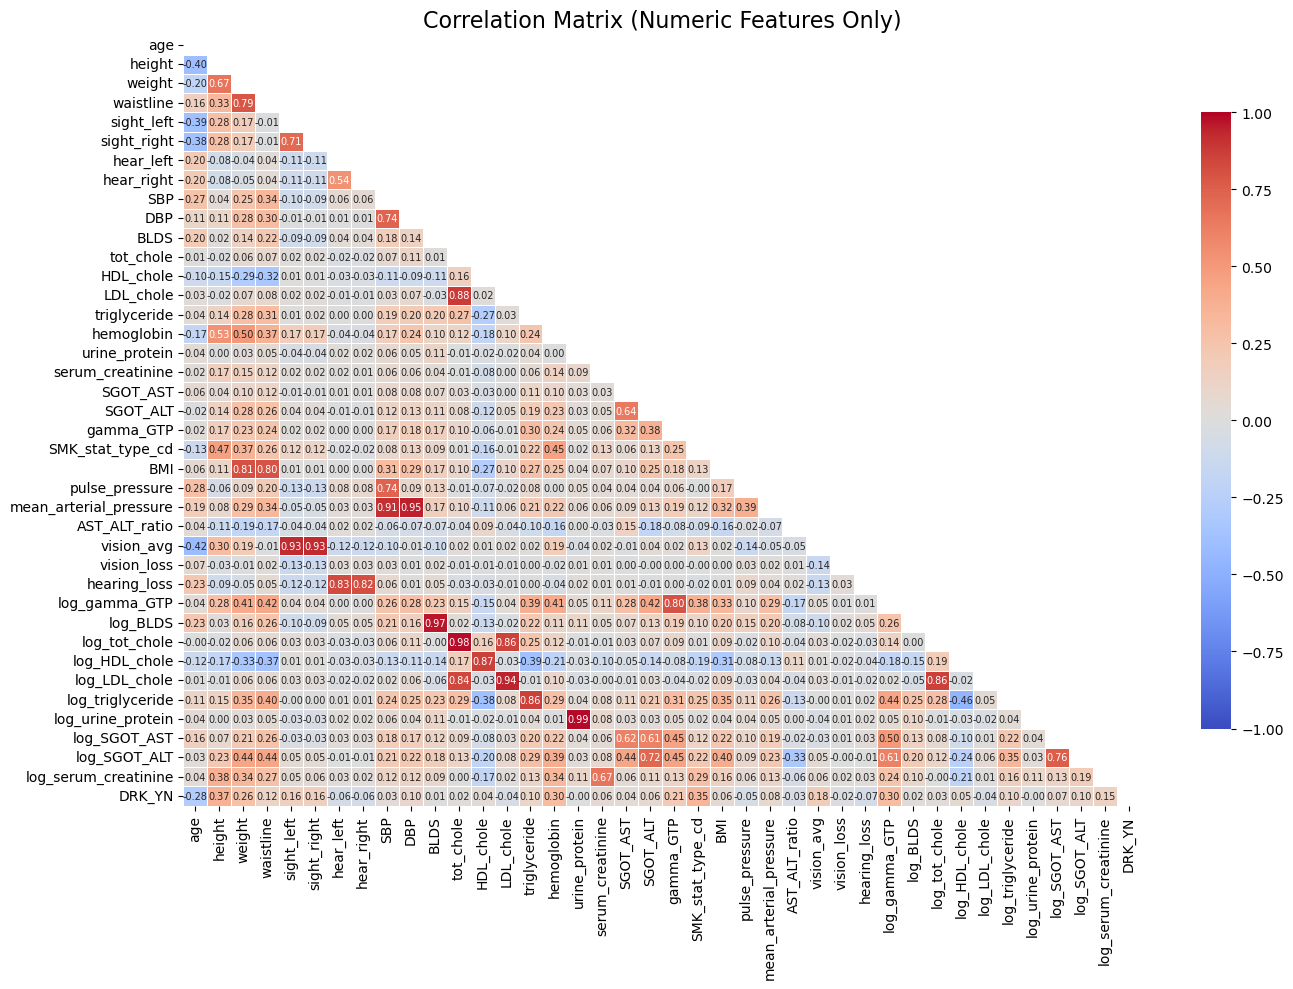

In [122]:
#Anyi0427: other methods to select?
print("\ncorrelation analysis:")
plot_correlation_matrix(df_for_logistic)

In [124]:
def select_low_vif_features(df, threshold=5.0):
    """
    Removes features with high VIF to reduce multicollinearity.

    Parameters:
        df: DataFrame with numeric features only (already scaled)
        threshold: VIF value above which a feature will be dropped

    Returns:
        A new DataFrame with low-VIF features only
    """
    df_vif = df.copy()

    # Step 1: Ensure only numeric and non-NaN columns are passed
    df_vif = df_vif.select_dtypes(include=['float64', 'int64'])  # remove non-numeric
    df_vif = df_vif.replace([np.inf, -np.inf], np.nan).dropna()  # remove inf and nan

    dropped = True
    while dropped:
        dropped = False
        vif = pd.DataFrame()
        vif["feature"] = df_vif.columns
        vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            drop_feature = vif.sort_values("VIF", ascending=False)["feature"].iloc[0]
            print(f"Dropping '{drop_feature}' with VIF = {max_vif:.2f}")
            df_vif = df_vif.drop(columns=[drop_feature])
            dropped = True

    print("\nFinal selected features (low multicollinearity):")
    print(df_vif.columns.tolist())
    return df_vif



In [126]:
df_logistic_vif_selected = select_low_vif_features(df_for_logistic)

/opt/anaconda3/envs/datamining_fss2025/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'sight_right' with VIF = inf


/opt/anaconda3/envs/datamining_fss2025/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'pulse_pressure' with VIF = inf


/opt/anaconda3/envs/datamining_fss2025/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'DBP' with VIF = inf
Dropping 'weight' with VIF = 134.30
Dropping 'log_tot_chole' with VIF = 64.77
Dropping 'urine_protein' with VIF = 51.91
Dropping 'LDL_chole' with VIF = 20.71
Dropping 'log_BLDS' with VIF = 16.20
Dropping 'tot_chole' with VIF = 9.42
Dropping 'hearing_loss' with VIF = 8.75
Dropping 'vision_avg' with VIF = 7.27
Dropping 'SBP' with VIF = 6.26
Dropping 'log_SGOT_ALT' with VIF = 5.53

Final selected features (low multicollinearity):
['age', 'height', 'waistline', 'sight_left', 'hear_left', 'hear_right', 'BLDS', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'BMI', 'mean_arterial_pressure', 'AST_ALT_ratio', 'vision_loss', 'log_gamma_GTP', 'log_HDL_chole', 'log_LDL_chole', 'log_triglyceride', 'log_urine_protein', 'log_SGOT_AST', 'log_serum_creatinine', 'DRK_YN']


In [128]:
print(df_logistic_vif_selected.head())

        age    height  waistline  sight_left  hear_left  hear_right      BLDS  \
0 -0.889514  0.835874   0.919525    0.145808  -0.180329   -0.177296 -0.058910   
1 -1.242090  1.913117   0.815267   -0.144050  -0.180329   -0.177296  0.230586   
2 -0.536938  0.297252   1.023782    0.725524  -0.180329   -0.177296 -0.100267   
3  0.168215  1.374495   1.023782    1.595097  -0.180329   -0.177296 -0.224337   
4  0.168215  0.297252  -0.123054    0.145808  -0.180329   -0.177296  0.023803   

   HDL_chole  triglyceride  hemoglobin  serum_creatinine  SGOT_AST  SGOT_ALT  \
0  -0.518422     -0.392788    1.810919          0.290374 -0.212371  0.351404   
1  -0.112353     -0.109022    0.990693          0.082270 -0.254936  0.389415   
2  -0.924490     -0.275368    0.990693          0.082270  0.894324  0.237373   
3   1.105852     -0.255798    2.126391          0.498477  0.128151  0.313394   
4   0.235705     -0.275368   -0.271194         -0.125833 -0.297501 -0.522835   

   gamma_GTP  SMK_stat_type_cd  

### 3.7 Outlier Treatment

In [ ]:
#Anyi0427: to be decided

### 3.7 Data Splitting(Train/Validation/Test)


In [130]:
def split_dataset(df, target_col='DRK_YN', train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    assert train_size + val_size + test_size == 1.0, "Train, val, and test sizes must sum to 1.0"

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Step 1: train vs temp (val+test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(val_size + test_size), stratify=y, random_state=random_state
    )

    # Step 2: validation vs test
    relative_val_size = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=(1 - relative_val_size), stratify=y_temp, random_state=random_state
    )

    return X_train, X_val, X_test, y_train, y_val, y_test


In [132]:
# For logistic regression
X_train_lr, X_val_lr, X_test_lr, y_train_lr, y_val_lr, y_test_lr = split_dataset(df_logistic_vif_selected)

# For Random Forest
X_train_rf, X_val_rf, X_test_rf, y_train_rf, y_val_rf, y_test_rf = split_dataset(df_for_rf)

# For XGBoost
X_train_xgb, X_val_xgb, X_test_xgb, y_train_xgb, y_val_xgb, y_test_xgb = split_dataset(df_for_xgb)

# For LightGBM
X_train_lgb, X_val_lgb, X_test_lgb, y_train_lgb, y_val_lgb, y_test_lgb = split_dataset(df_for_lgb)


## 4. Modeling

### 4.1 Baseline Model: Logistic Regression

To balance model interpretability and multicollinearity control, we implemented a hybrid feature selection approach:

- **Manual selection**: Based on domain knowledge (keep/drop specific features)
- **VIF-based filtering**: Automatically remove features with VIF > 5


In [134]:
def train_logistic_regression(X_train, y_train, X_val, y_val, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(X_train, y_train)

    def evaluate(name, X_eval, y_eval):
        y_pred = model.predict(X_eval)
        acc = accuracy_score(y_eval, y_pred)
        print(f"\n[{name} Accuracy] {acc:.4f}")
        print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred))
        print("Classification Report:\n", classification_report(y_eval, y_pred))

    print("\n--- Evaluating Logistic Regression ---")
    evaluate("Validation", X_val, y_val)
    evaluate("Test", X_test, y_test)

    return model, X_train.columns.tolist()

In [136]:
# Automatically remove features with VIF > 5
logistic_model = train_logistic_regression(X_train_lr, y_train_lr, X_val_lr, y_val_lr, X_test_lr, y_test_lr)


--- Evaluating Logistic Regression ---

[Validation Accuracy] 0.7275
Confusion Matrix:
 [[54985 19394]
 [21131 53192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     74379
           1       0.73      0.72      0.72     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702


[Test Accuracy] 0.7292
Confusion Matrix:
 [[55288 19091]
 [21175 53148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     74379
           1       0.74      0.72      0.73     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702



#### 4.1.1 Visualization: Coefficient Bar Plot


In [138]:
def plot_logistic_coefficients(model, feature_names, top_n=None):
    coefs = model.coef_[0]
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs,
        'Abs_Coefficient': np.abs(coefs),
        'Direction': ['Positive' if c > 0 else 'Negative' for c in coefs]
    })

    if top_n:
        coef_df = coef_df.nlargest(top_n, 'Abs_Coefficient')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=coef_df.sort_values('Coefficient'),
                x='Coefficient', y='Feature',
                hue='Direction', dodge=False, palette={'Positive': 'green', 'Negative': 'red'})

    plt.axvline(0, color='black', linestyle='--')
    plt.title('Logistic Regression Coefficients')
    plt.tight_layout()
    plt.show()



--- Evaluating Logistic Regression ---

[Validation Accuracy] 0.7275
Confusion Matrix:
 [[54985 19394]
 [21131 53192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     74379
           1       0.73      0.72      0.72     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702


[Test Accuracy] 0.7292
Confusion Matrix:
 [[55288 19091]
 [21175 53148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     74379
           1       0.74      0.72      0.73     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702



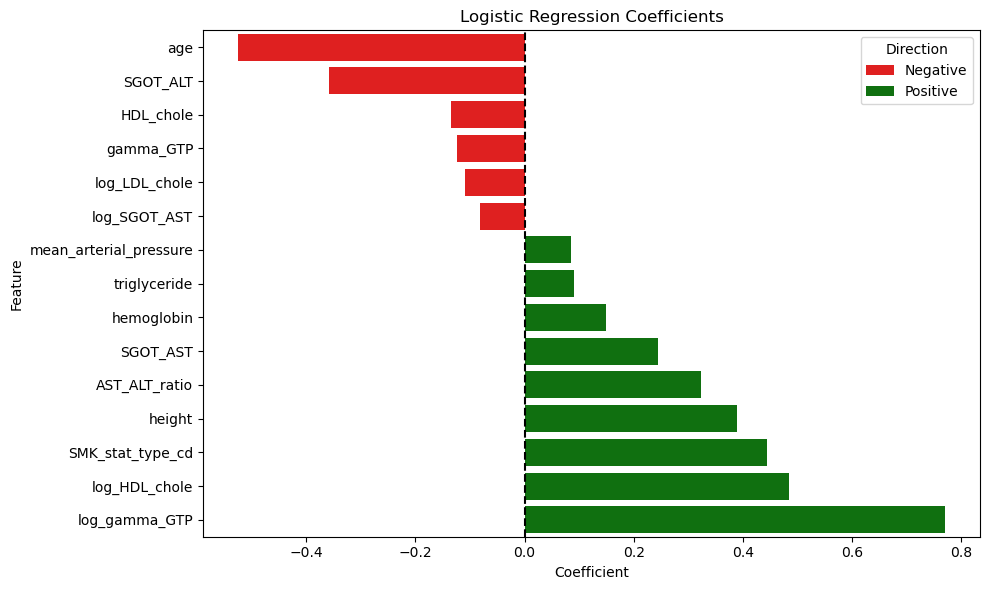

In [140]:
model, selected_features = train_logistic_regression(X_train_lr, y_train_lr, X_val_lr, y_val_lr, X_test_lr, y_test_lr)
# Visualize model coefficients
plot_logistic_coefficients(model, feature_names=selected_features, top_n=15)

#### 4.1.2 Visualization: Confusion Matrix Heatmap

In [142]:
def plot_confusion_matrix(y_true, y_pred, labels=[0, 1]):
    """
    Plot a confusion matrix heatmap.
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()


--- Evaluating Logistic Regression ---

[Validation Accuracy] 0.7275
Confusion Matrix:
 [[54985 19394]
 [21131 53192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     74379
           1       0.73      0.72      0.72     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702


[Test Accuracy] 0.7292
Confusion Matrix:
 [[55288 19091]
 [21175 53148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     74379
           1       0.74      0.72      0.73     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702



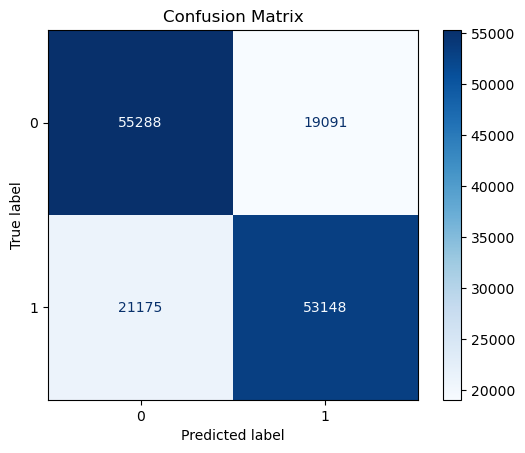

In [144]:
model, selected_features = train_logistic_regression(X_train_lr, y_train_lr, X_val_lr, y_val_lr, X_test_lr, y_test_lr)
# Outcome
y_pred_test = model.predict(X_test_lr)

# Plot confusion matrix
plot_confusion_matrix(y_test_lr, y_pred_test)

#### 4.1.3 Visualization: ROC Curve with AUC Score

In [146]:
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


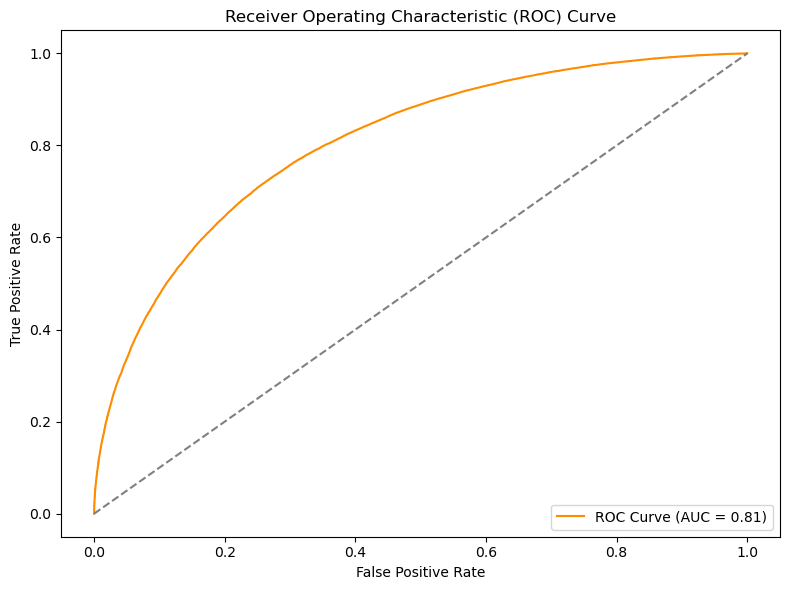

In [148]:
# Plot ROC curve
plot_roc_curve(model, X_test_lr, y_test_lr)


### 4.2 Tree-based Models Random Forest

#### 4.2.1 Random Forest

In [150]:
def train_random_forest(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize and train
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluation function
    def evaluate(name, X, y):
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print(f"\n[{name} Accuracy] {acc:.4f}")
        print(f"{name} Confusion Matrix:\n", confusion_matrix(y, y_pred))
        print(f"{name} Classification Report:\n", classification_report(y, y_pred))
        return y_pred

    # Evaluate on validation and test sets
    y_val_pred = evaluate("Validation", X_val, y_val)
    y_test_pred = evaluate("Test", X_test, y_test)

    return model, y_test_pred

In [152]:
# Training random forest model
rf_model, y_pred_rf = train_random_forest(
    X_train_rf, y_train_rf, X_val_rf, y_val_rf, X_test_rf, y_test_rf
)


[Validation Accuracy] 0.7345
Validation Confusion Matrix:
 [[54939 19440]
 [20047 54276]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74     74379
           1       0.74      0.73      0.73     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702


[Test Accuracy] 0.7351
Test Confusion Matrix:
 [[55226 19153]
 [20237 54086]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74     74379
           1       0.74      0.73      0.73     74323

    accuracy                           0.74    148702
   macro avg       0.74      0.74      0.74    148702
weighted avg       0.74      0.74      0.74    148702



##### 4.2.1.1 Visualization: Feature Importances

In [155]:
def plot_rf_feature_importance(model, feature_names, top_n=15):
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    if top_n:
        importance_df = importance_df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title("Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()

/var/folders/ds/5wct1gj9553bgnft0x7x5tb40000gn/T/ipykernel_1099/3677871197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


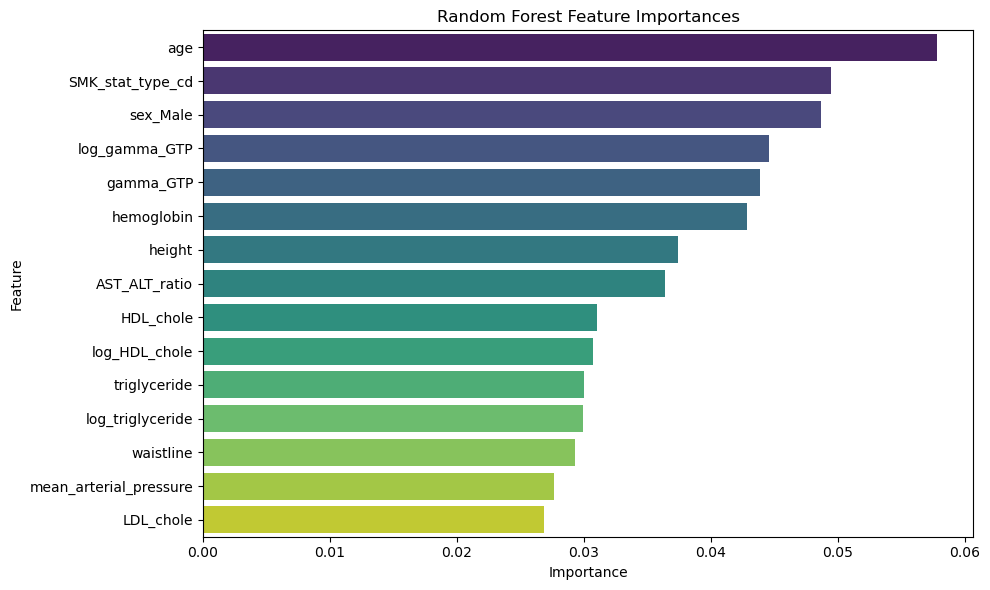

In [157]:
# Plot feature importances
plot_rf_feature_importance(rf_model, feature_names=X_train_rf.columns.tolist(), top_n=15)

##### 4.2.1.2 Visualization: Confusion Matrix

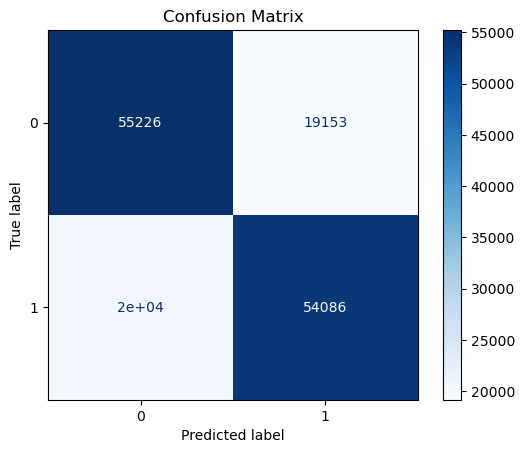

In [159]:
# Plot confusion matrix on test set
plot_confusion_matrix(y_test_rf, y_pred_rf)

##### 4.2.1.3 Visualization: ROC Curve

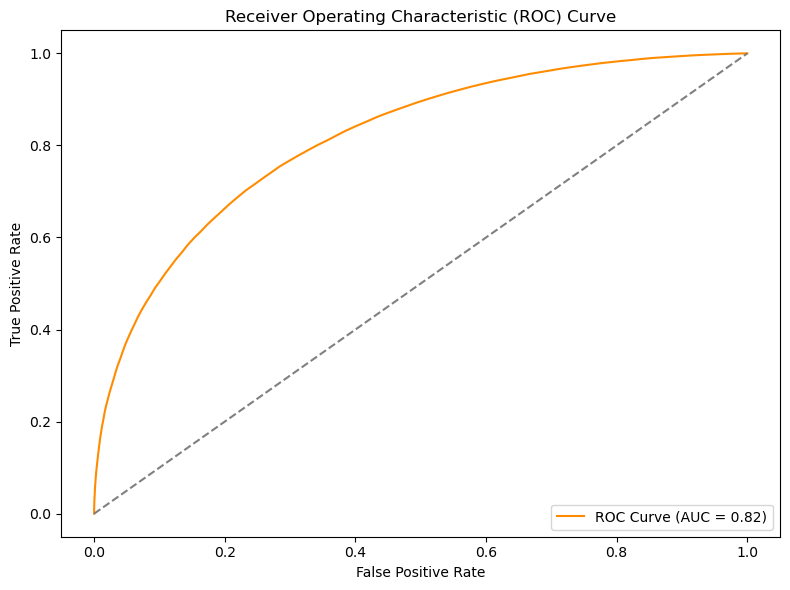

In [161]:
# Plot ROC curve
plot_roc_curve(rf_model, X_test_rf, y_test_rf)

#### 4.2.2 XGBoost

In [163]:
def train_xgboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize and train the model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)

    # Evaluation function
    def evaluate(name, X, y):
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print(f"\n[{name} Accuracy] {acc:.4f}")
        print(f"{name} Confusion Matrix:\n", confusion_matrix(y, y_pred))
        print(f"{name} Classification Report:\n", classification_report(y, y_pred))
        return y_pred

    # Evaluate on validation and test sets
    y_val_pred = evaluate("Validation", X_val, y_val)
    y_test_pred = evaluate("Test", X_test, y_test)

    return model, y_test_pred

In [165]:
# Train the XGBoost model
xgb_model, y_pred_xgb = train_xgboost(
    X_train_xgb, y_train_xgb, X_val_xgb, y_val_xgb, X_test_xgb, y_test_xgb
)

/opt/anaconda3/envs/datamining_fss2025/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:35:48] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[Validation Accuracy] 0.7384
Validation Confusion Matrix:
 [[54694 19685]
 [19219 55104]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     74379
           1       0.74      0.74      0.74     74323

    accuracy                           0.74    148702
   macro avg       0.74      0.74      0.74    148702
weighted avg       0.74      0.74      0.74    148702


[Test Accuracy] 0.7402
Test Confusion Matrix:
 [[55003 19376]
 [19260 55063]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     74379
           1       0.74      0.74      0.74     74323

    accuracy                           0.74    148702
   macro avg       0.74      0.74      0.74    148702
weighted avg       0.74      0.74      0.74    148702



##### 4.2.2.1 Visualization: Feature Importances

In [167]:
def plot_xgb_feature_importance(model, feature_names, top_n=15):
    importance_dict = model.get_booster().get_score(importance_type='gain')
    importance_df = pd.DataFrame({
        'Feature': list(importance_dict.keys()),
        'Importance': list(importance_dict.values())
    })

    # Sort and match names (some XGBoost keys may be like f0, f1, ... unless feature_names are passed correctly)
    if all(f.startswith('f') for f in importance_df['Feature']):
        importance_df['Feature'] = [feature_names[int(f[1:])] for f in importance_df['Feature']]

    importance_df = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')
    plt.title("XGBoost Feature Importances (Gain)")
    plt.tight_layout()
    plt.show()

/var/folders/ds/5wct1gj9553bgnft0x7x5tb40000gn/T/ipykernel_1099/2033818380.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


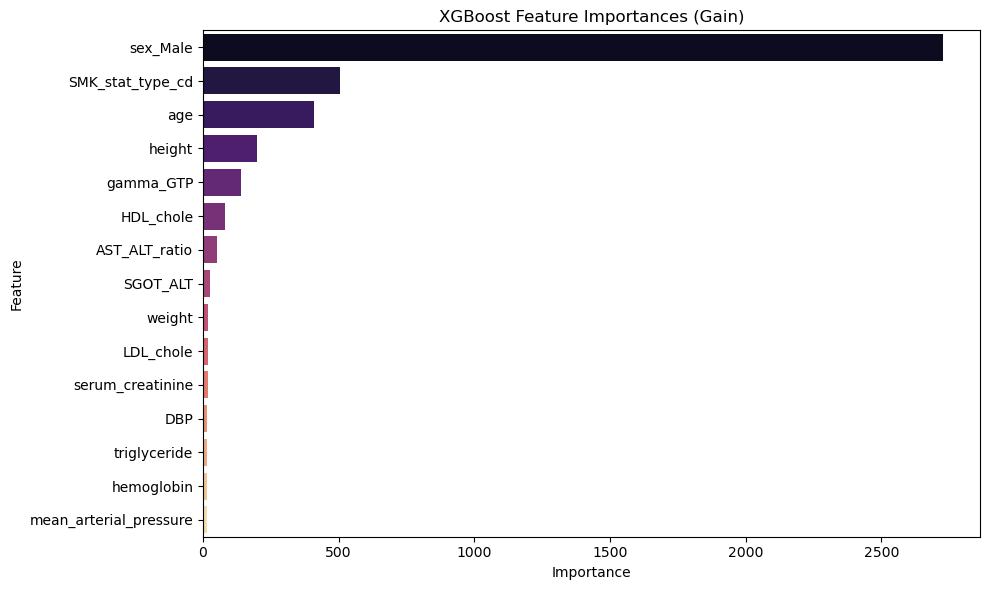

In [169]:
# Plot feature importances
plot_xgb_feature_importance(xgb_model, feature_names=X_train_xgb.columns.tolist(), top_n=15)

##### 4.2.2.2 Visualization: Confusion Matrix

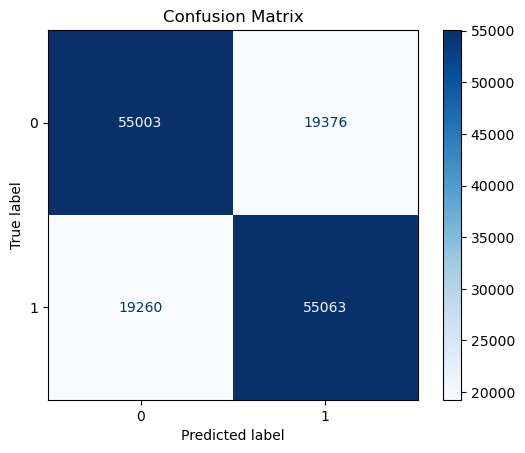

In [171]:
# Plot confusion matrix
plot_confusion_matrix(y_test_xgb, y_pred_xgb)

##### 4.2.2.3 Visualization: ROC Curve

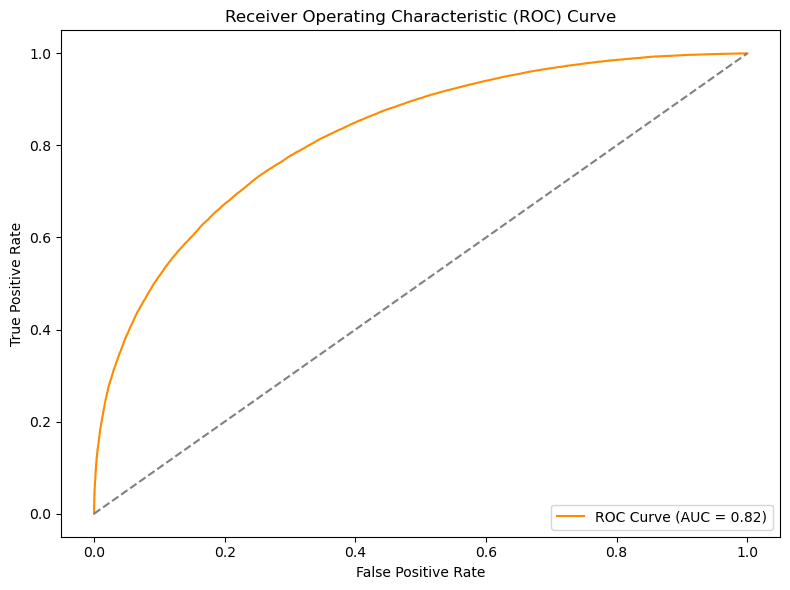

In [173]:
# Plot ROC curve
plot_roc_curve(xgb_model, X_test_xgb, y_test_xgb)

#### 4.2.3 LightGBM

In [175]:
def train_lightgbm(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize and train
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluation function
    def evaluate(name, X, y):
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print(f"\n[{name} Accuracy] {acc:.4f}")
        print(f"{name} Confusion Matrix:\n", confusion_matrix(y, y_pred))
        print(f"{name} Classification Report:\n", classification_report(y, y_pred))
        return y_pred

    # Evaluate on validation and test sets
    y_val_pred = evaluate("Validation", X_val, y_val)
    y_test_pred = evaluate("Test", X_test, y_test)

    return model, y_test_pred

In [177]:
# Train the LightGBM model
lgb_model, y_pred_lgb = train_lightgbm(
    X_train_lgb, y_train_lgb, X_val_lgb, y_val_lgb, X_test_lgb, y_test_lgb
)

[LightGBM] [Info] Number of positive: 346842, number of negative: 347100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5572
[LightGBM] [Info] Number of data points in the train set: 693942, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499814 -> initscore=-0.000744
[LightGBM] [Info] Start training from score -0.000744

[Validation Accuracy] 0.7394
Validation Confusion Matrix:
 [[54422 19957]
 [18802 55521]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74     74379
           1       0.74      0.75      0.74     74323

    accuracy                           0.74    148702
   macro avg       0.74      0.74      0.74    148702
weighted avg       0.74      0.74      0.74    148702


[Test Accuracy] 0.7406
Test Confusion Matrix:
 [[

##### 4.2.3.1 Visualization: Feature Importances

/var/folders/ds/5wct1gj9553bgnft0x7x5tb40000gn/T/ipykernel_1099/3677871197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


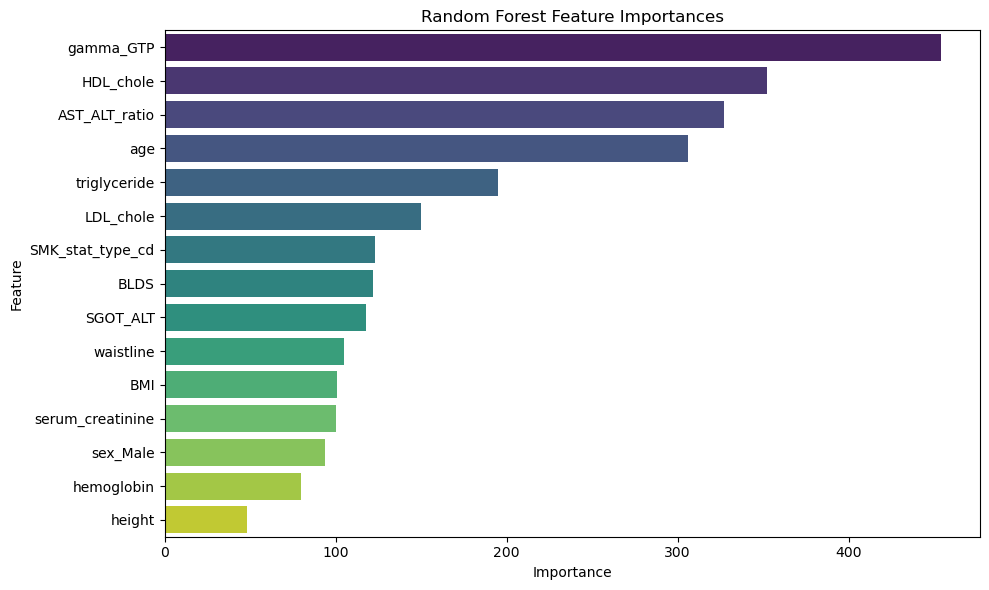

In [179]:
# Plot feature importances
plot_rf_feature_importance(lgb_model, feature_names=X_train_lgb.columns.tolist(), top_n=15)

##### 4.2.3.2 Visualization: Confusion Matrix


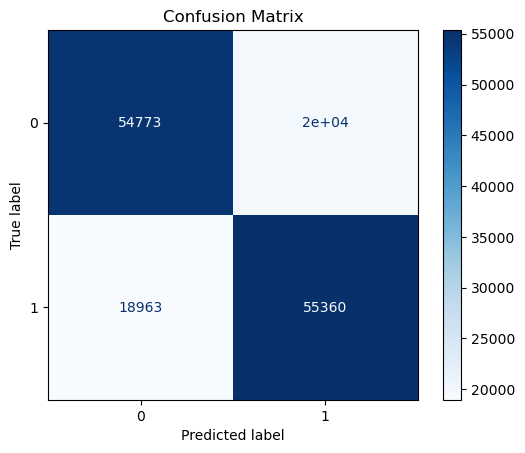

In [181]:
# Plot confusion matrix
plot_confusion_matrix(y_test_lgb, y_pred_lgb)

##### 4.2.3.3 Visualization: ROC Curve

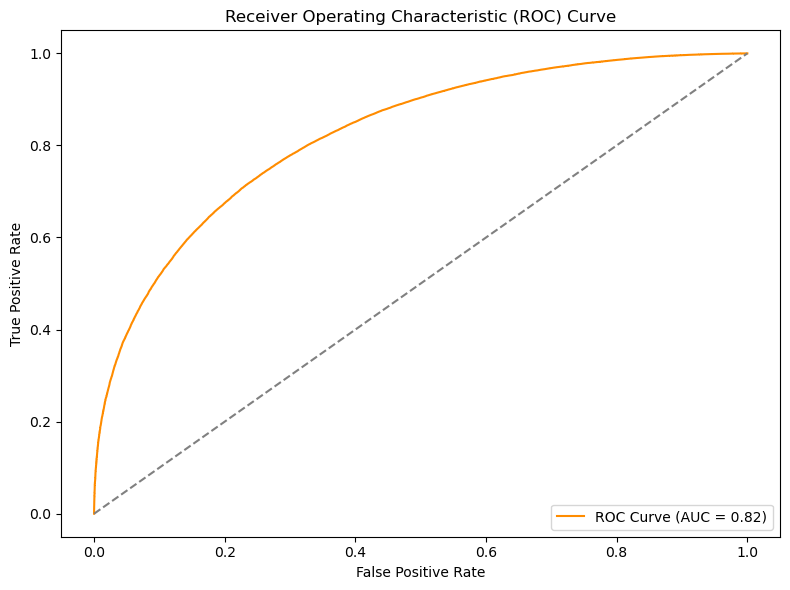

In [183]:
# Plot ROC curve
plot_roc_curve(lgb_model, X_test_lgb, y_test_lgb)

### 4.3 Neural Network Model

## 5. Evaluation Metrics

### 5.1 Model Interpretability with SHAP
- SHAP Sparsity: top-k feature dominance
- SHAP Stability: neighbor-wise consistency
- Identify top predictors like γ-GTP and BMI